# Lab 4

In [1]:
!pip install wordcloud
import nltk
nltk.download('punkt')
import string
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tjani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
f = open('en_US.blogs.txt', encoding="utf8")

In [3]:
blogs = f.read()

## Limpieza de datos

### Tokenization

In [4]:
blogs = nltk.word_tokenize(blogs)

In [10]:
for i in range(10):
    print(blogs[i])

In
the
years
thereafter
,
most
of
the
Oil
fields


### Signos de puntuacion y caracteres

In [5]:
blogs = [blog for blog in blogs if blog.isalpha()]

In [12]:
for i in range(10):
    print(blogs[i])

In
the
years
thereafter
most
of
the
Oil
fields
and


### Palabras a minusculas

In [6]:
blogs = [w.lower() for w in blogs]

### Stopwords

In [7]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tjani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stop_words = set(stopwords.words('english'))

In [9]:
blogs = [w for w in blogs if not w in stop_words]

In [19]:
for i in range(35):
    print(blogs[i])

years
thereafter
oil
fields
platforms
named
pagan
gods
love
brown
chad
awesome
kids
holding
fort
work
later
usual
kids
busy
together
playing
skylander
xbox
together
kyan
cashed
piggy
bank
wanted
game
bad
used
gift
card


### Stemming

In [10]:
from nltk.stem.porter import PorterStemmer

In [11]:
porter = PorterStemmer()

In [12]:
blogs = [porter.stem(word) for word in blogs]

In [23]:
for i in range(100):
    print(blogs[i])

year
thereaft
oil
field
platform
name
pagan
god
love
brown
chad
awesom
kid
hold
fort
work
later
usual
kid
busi
togeth
play
skyland
xbox
togeth
kyan
cash
piggi
bank
want
game
bad
use
gift
card
birthday
save
money
get
never
tap
thing
either
know
want
bad
made
count
money
make
sure
enough
cute
watch
reaction
realiz
also
good
job
let
lola
feel
like
play
let
switch
charact
love
almost
much
anyway
go
share
home
decor
inspir
store
folder
puter
amaz
imag
store
away
readi
come
life
get
home
graduat
season
right
around
corner
nanci
whip
fun
set
help
graduat
card


## Analisis Exploratorio

### Frecuencia de palabras

In [13]:
from nltk import ngrams, FreqDist

In [14]:
word_count = nltk.FreqDist(blogs)

In [16]:
c=0
for key in (word_count):
    c+=1
    print(key, word_count[key])
    if c>10: break

one 133653
like 109994
time 105746
get 94683
would 85401
go 82154
make 80287
day 70483
know 68949
year 66155
use 64289


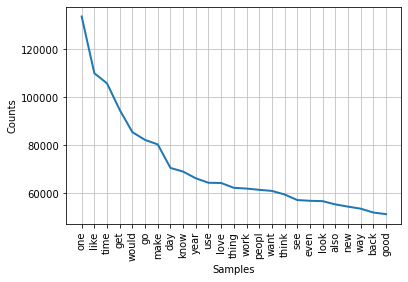

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
word_count.plot(25, cumulative=False)

In [18]:
words = ' '.join(blogs)

In [19]:
wordcloud = WordCloud().generate(words)

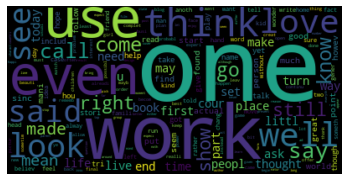

In [20]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## N-Gramas

### 2-gramas

In [13]:
two_grams = ngrams(blogs, n=2)

NameError: name 'ngrams' is not defined

In [22]:
two_grams_freq = collections.Counter(two_grams)

In [23]:
two_grams_freq.most_common(20)

[(('look', 'like'), 6718),
 (('feel', 'like'), 5931),
 (('year', 'ago'), 5725),
 (('last', 'year'), 5233),
 (('new', 'york'), 5083),
 (('even', 'though'), 4749),
 (('would', 'like'), 4580),
 (('last', 'week'), 4526),
 (('make', 'sure'), 4494),
 (('first', 'time'), 4259),
 (('year', 'old'), 4152),
 (('one', 'thing'), 3641),
 (('one', 'day'), 3543),
 (('last', 'night'), 3392),
 (('everi', 'day'), 3261),
 (('look', 'forward'), 3095),
 (('go', 'back'), 3089),
 (('high', 'school'), 2792),
 (('seem', 'like'), 2758),
 (('long', 'time'), 2669)]

### 3-gramas

In [24]:
three_grams = ngrams(blogs, n=3)

In [25]:
three_grams_freq = collections.Counter(three_grams)

In [26]:
three_grams_freq.most_common(20)

[(('new', 'york', 'citi'), 851),
 (('new', 'york', 'time'), 630),
 (('amazon', 'servic', 'llc'), 427),
 (('servic', 'llc', 'amazon'), 426),
 (('llc', 'amazon', 'eu'), 426),
 (('coupl', 'week', 'ago'), 418),
 (('incorpor', 'item', 'pp'), 389),
 (('two', 'year', 'ago'), 351),
 (('ca', 'wait', 'see'), 306),
 (('look', 'forward', 'see'), 305),
 (('world', 'war', 'ii'), 300),
 (('let', 'us', 'know'), 281),
 (('mani', 'year', 'ago'), 281),
 (('coupl', 'year', 'ago'), 276),
 (('long', 'time', 'ago'), 275),
 (('make', 'feel', 'like'), 273),
 (('spend', 'lot', 'time'), 267),
 (('would', 'like', 'see'), 265),
 (('want', 'make', 'sure'), 264),
 (('preheat', 'oven', 'degre'), 262)]

### 4 gramas

In [27]:
four_grams = ngrams(blogs, n=4)

In [28]:
four_grams_freq = collections.Counter(four_grams)

In [29]:
four_grams_freq.most_common(20)

[(('amazon', 'servic', 'llc', 'amazon'), 426),
 (('servic', 'llc', 'amazon', 'eu'), 426),
 (('vest', 'interest', 'vest', 'interest'), 251),
 (('interest', 'vest', 'interest', 'vest'), 250),
 (('come', 'amazon', 'servic', 'llc'), 214),
 (('content', 'provid', 'subject', 'chang'), 214),
 (('provid', 'subject', 'chang', 'remov'), 214),
 (('subject', 'chang', 'remov', 'time'), 214),
 (('particip', 'amazon', 'servic', 'llc'), 213),
 (('llc', 'amazon', 'eu', 'associ'), 213),
 (('amazon', 'eu', 'associ', 'programm'), 213),
 (('eu', 'associ', 'programm', 'design'), 213),
 (('associ', 'programm', 'design', 'provid'), 213),
 (('programm', 'design', 'provid', 'mean'), 213),
 (('design', 'provid', 'mean', 'site'), 213),
 (('provid', 'mean', 'site', 'earn'), 213),
 (('mean', 'site', 'earn', 'advertis'), 213),
 (('site', 'earn', 'advertis', 'fee'), 213),
 (('earn', 'advertis', 'fee', 'advertis'), 213),
 (('advertis', 'fee', 'advertis', 'link'), 213)]

## Predicciones

In [17]:
ngramas = {
    2: list(two_grams),
    3: list(three_grams),
    4: list(four_grams)
}

print(len(blogs))

NameError: name 'two_grams' is not defined

In [18]:

#Aqui lo convertimos todo a oraciones de 10 palabras.
blogs_dataset = [[]]
c = 0
for blog in blogs:
    blogs_dataset[int(c/10)].append(blog)
    c+=1
    if c %10 == 0:
        blogs_dataset.append([])

In [15]:
from collections import Counter, defaultdict
from nltk.corpus import reuters
from nltk import bigrams, trigrams
nltk.download('reuters')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\tjani\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [19]:
model = defaultdict(lambda: defaultdict(lambda: 0))

print(blogs[0])

for sentence in blogs_dataset:
    for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
        model[(w1, w2)][w3] += 1
        
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3] /= total_count

year


In [20]:
for sentence in reuters.sents():
    for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
        model[(w1, w2)][w3] += 1

In [21]:
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3] /= total_count

In [23]:
dict(model['I', 'am'])

{'concerned': 0.046153846153846156,
 'committed': 0.03076923076923077,
 'encouraged': 0.015384615384615385,
 'afraid': 0.046153846153846156,
 'more': 0.015384615384615385,
 'of': 0.03076923076923077,
 'deeply': 0.046153846153846156,
 'confident': 0.07692307692307693,
 'talking': 0.015384615384615385,
 'sure': 0.15384615384615385,
 'convinced': 0.06153846153846154,
 'pleased': 0.015384615384615385,
 ',': 0.015384615384615385,
 'not': 0.1076923076923077,
 'speculating': 0.03076923076923077,
 'happy': 0.015384615384615385,
 'for': 0.015384615384615385,
 'against': 0.015384615384615385,
 'very': 0.015384615384615385,
 'cautiously': 0.015384615384615385,
 'optimistic': 0.03076923076923077,
 'sceptical': 0.015384615384615385,
 'hopeful': 0.015384615384615385,
 'now': 0.015384615384615385,
 'unable': 0.015384615384615385,
 'expecting': 0.015384615384615385,
 'astonished': 0.015384615384615385,
 'joining': 0.015384615384615385,
 'on': 0.015384615384615385,
 'inclined': 0.015384615384615385,
 '

## NEWS

In [8]:
f = open('en_US.news.txt', encoding="utf8")

In [9]:
news = f.read()

In [10]:
news = nltk.word_tokenize(news)

In [11]:
for i in range(10):
    print(news[i])

He
was
n't
home
alone
,
apparently
.
The
St.


In [12]:
news = [new for new in news if new.isalpha()]

In [13]:
for i in range(10):
    print(news[i])

He
was
home
alone
apparently
The
Louis
plant
had
to


In [14]:
news = [w.lower() for w in news]

In [17]:
stop_words = set(stopwords.words('english'))

In [18]:
news = [w for w in news if not w in stop_words]

In [19]:
for i in range(35):
    print(news[i])

home
alone
apparently
louis
plant
close
would
die
old
age
workers
making
cars
since
onset
mass
automotive
production
wsu
plans
quickly
became
hot
topic
local
online
sites
though
people
applauded
plans
new
biomedical
center
many


In [21]:
porter = PorterStemmer()

In [22]:
news = [porter.stem(word) for word in news]

In [23]:
for i in range(100):
    print(news[i])

home
alon
appar
loui
plant
close
would
die
old
age
worker
make
car
sinc
onset
mass
automot
product
wsu
plan
quickli
becam
hot
topic
local
onlin
site
though
peopl
applaud
plan
new
biomed
center
mani
deplor
potenti
loss
build
alaimo
group
mount
holli
contract
last
fall
evalu
suggest
improv
trenton
water
work
campaign
financ
record
releas
week
show
two
employe
donat
total
polit
action
committe
pac
partner
progress
earli
june
partner
progress
report
gave
direct
contribut
mayor
toni
mack
two
week
lead
victori
mayor
runoff
elect
june
often
difficult
predict
law
impact
legisl
think
twice
carri
bill
absolut
necessari
issu


In [25]:
word_count = nltk.FreqDist(news)

In [26]:
for key in (word_count):
    print(key, word_count[key])

said 250311
year 106090
one 86550
would 75833
new 70273
state 65998
time 65816
say 63081
like 60443
get 59951
also 58738
two 57253
go 56082
last 52643
first 52547
make 52263
work 49897
peopl 48598
game 47967
school 46658
citi 45388
could 44945
play 43746
day 42971
includ 39375
team 38234
take 37760
use 37715
want 37601
back 36204
call 34762
home 34490
percent 34422
counti 33790
even 33683
three 33548
come 33528
million 32786
way 32570
season 31985
start 31822
compani 31283
week 31272
good 31253
need 30881
mani 30260
look 30001
offic 29949
think 29909
run 29580
help 29417
show 29372
may 28974
report 28757
know 28538
point 27987
made 27899
plan 27334
polic 27284
right 27198
much 26582
still 26470
see 26320
month 25244
thing 25223
hous 24836
famili 24777
well 24658
open 24459
end 24005
sinc 23912
tri 23823
public 23553
nation 23410
center 22964
place 22781
job 22756
part 22414
second 22281
busi 22234
anoth 22186
high 21816
presid 21759
live 21616
group 21528
offici 21480
four 21462
got 21

everybodi 3328
flight 3327
rel 3323
electr 3322
publish 3319
appli 3318
decemb 3317
civil 3316
extend 3314
audienc 3310
theater 3305
airport 3304
fli 3302
popul 3301
transit 3301
danger 3300
sweet 3294
nba 3292
negoti 3288
lane 3287
flavor 3283
global 3280
richard 3275
progress 3273
simpl 3273
neighbor 3273
weather 3264
plate 3264
speed 3253
coast 3247
glass 3238
gift 3233
impress 3231
wind 3224
older 3217
ford 3206
indian 3197
sun 3193
peter 3193
bag 3187
diseas 3187
guest 3180
materi 3180
convict 3178
convers 3178
societi 3176
crash 3175
chef 3175
twice 3173
admit 3171
complex 3164
occur 3158
applic 3156
maintain 3154
particularli 3151
poor 3150
blood 3145
southern 3140
gather 3140
client 3140
entertain 3136
oppos 3133
cool 3133
rush 3133
born 3132
sort 3128
ceo 3126
grew 3123
fifth 3119
stretch 3114
surgeri 3114
trust 3110
zone 3101
oppon 3096
afford 3094
spokeswoman 3091
sheriff 3088
advantag 3081
harri 3079
basic 3072
shift 3072
inspir 3072
subject 3071
presidenti 3059
western 304

solo 1230
semifin 1229
massachusett 1228
cafe 1228
outcom 1228
interact 1226
parad 1225
slowli 1225
jimmi 1224
turner 1224
wheel 1223
hat 1222
muslim 1222
phase 1222
assur 1221
laid 1221
faster 1219
desper 1217
itali 1216
eas 1216
volum 1215
jennif 1215
atmospher 1215
contemporari 1214
russel 1214
garlic 1213
weekli 1211
minimum 1211
prescript 1209
susan 1208
moder 1208
carter 1207
solv 1206
drawn 1205
promin 1205
pipelin 1205
sight 1204
succeed 1204
bryant 1204
circumst 1203
stream 1203
depth 1201
blog 1200
tablespoon 1200
alli 1199
dow 1199
tale 1198
fals 1198
specul 1198
adapt 1198
string 1197
thin 1196
quot 1192
laden 1191
minneapoli 1190
knight 1186
statewid 1186
stuck 1184
toy 1184
pocket 1184
anyway 1183
iphon 1183
zimmerman 1183
cycl 1182
craig 1182
hide 1182
anonym 1180
basket 1180
custodi 1180
layoff 1179
encount 1178
navi 1178
narrow 1177
thick 1175
nelson 1175
gilbert 1175
ken 1175
headlin 1175
juror 1174
excess 1172
ideal 1171
registr 1171
chemic 1171
c 1169
chosen 1169
re

invas 659
portfolio 659
fade 658
bloom 658
sausag 658
champagn 658
flew 657
eleg 657
reid 657
thunder 656
cape 656
nowher 655
cunningham 655
hug 654
offset 654
collector 653
atop 653
democraci 652
scrambl 652
emili 652
arab 652
monro 650
martinez 650
hung 650
insight 649
rant 649
horn 649
microsoft 649
uo 649
freehold 649
matheni 648
badli 648
laptop 648
mo 648
flaw 648
redevelop 647
gibson 647
dot 647
outlook 647
k 647
toler 646
andr 646
boundari 646
costli 646
inner 646
persist 646
regret 645
smartphon 645
can 644
sierra 644
springfield 643
powel 643
courthous 643
rivera 643
infant 642
wet 642
liabil 642
perez 642
standout 641
øthe 641
pleasur 641
tube 640
rebel 640
arkansa 640
induct 640
supplement 639
intimid 639
ruin 639
tressel 638
array 638
dale 638
clackama 638
clemen 638
cow 638
shaker 638
surrend 637
warehous 637
secondari 637
phrase 637
patio 637
spare 636
grandfath 636
trailer 636
concess 636
brilliant 635
stimulu 635
shield 635
composit 635
silenc 635
latter 634
surgeon 63

backer 400
verbal 400
poorli 400
widen 400
soften 400
palestinian 400
lifelong 400
paycheck 400
vitamin 400
lightn 399
tick 399
blanc 399
tow 399
lin 399
perk 399
padr 399
solicit 398
shallow 398
amber 398
marquett 398
molli 398
dioces 398
petti 397
frees 397
billionair 397
instinct 397
dylan 397
wallet 396
awkward 396
unpaid 396
subsidiari 396
groom 396
katz 396
heather 396
steadili 396
brace 396
claus 395
debbi 395
eu 395
altogeth 395
spinach 395
hank 394
ambit 394
asparagu 394
pga 393
chancellor 393
receipt 393
gem 393
appetit 393
donovan 393
blackberri 393
simmon 393
westbrook 393
landlord 393
geograph 392
bracket 392
rabbit 392
komen 392
credenti 392
clever 392
reel 391
coliseum 391
eras 391
swallow 391
tumor 391
wesley 391
blackmon 391
rafael 391
curat 390
wrongdo 390
poem 390
vigil 390
overhead 390
californian 389
belli 389
lawson 389
lyon 389
arguabl 389
gospel 389
hannah 389
grower 388
lockout 388
sneiderman 388
proport 388
laundri 388
beck 388
vagu 388
ritual 388
newton 388
t

catalog 270
tiffani 270
arlington 270
manuel 270
valv 270
ge 270
inact 270
dilig 270
centr 270
thailand 270
salvag 270
conway 270
duplic 270
westbound 270
eurozon 269
mega 269
revisit 269
wive 269
wagon 269
inher 269
veggi 269
uncommon 269
lavish 269
bankrupt 269
berni 269
unleash 269
shuffl 269
halak 269
hefti 268
melodi 268
cobb 268
heisman 268
sach 268
accuraci 268
kristen 268
marsh 268
conven 268
athen 268
immers 268
runoff 267
collar 267
holmgren 267
kyron 267
rye 267
antibiot 267
milwauki 267
buyout 267
cranberri 267
taho 267
woke 267
rodney 267
celeri 267
fist 267
handi 267
felton 267
nook 267
nova 267
villain 267
resili 267
safeguard 266
meatbal 266
heartbreak 266
salut 266
cutler 266
bash 266
haley 266
shea 266
tailor 266
redesign 265
flesh 265
compliment 265
quirki 265
dent 265
prey 265
uphold 265
infam 265
cruze 265
lili 265
dugout 265
bluff 265
vietnames 265
likewis 265
parsley 265
mustang 265
rancho 264
timeout 264
dispens 264
dug 264
devin 264
dh 264
treati 264
reggi 264


spree 196
comptrol 196
geithner 196
depp 196
hone 196
bernstein 196
avert 196
atm 196
tooth 196
segreg 196
theolog 196
glee 196
honesti 196
deptford 196
estrang 195
inhal 195
mozeliak 195
zinfandel 195
fisherman 195
spite 195
carmelo 195
wager 195
armor 195
ag 195
skyrocket 195
creve 195
postur 195
jensen 195
hathaway 195
kc 195
yost 195
concord 195
blender 195
bald 195
pricey 195
bureaucraci 195
staircas 195
catalyst 195
drawer 195
getaway 195
norway 195
novak 195
mead 194
outpost 194
syndic 194
hose 194
apollo 194
tarp 194
twelv 194
sacrif 194
upfront 194
evergreen 194
nix 194
concoct 194
penal 194
dispers 194
souvenir 194
atom 194
scrutin 194
refinanc 194
witch 194
coars 194
humanitarian 194
diver 194
emerson 194
lent 194
forese 194
schaefer 194
verd 194
oasi 194
porn 194
referr 193
soloist 193
drank 193
malcolm 193
pundit 193
masterson 193
perron 193
chandeli 193
v 193
fickel 193
assn 193
cruelti 192
clarenc 192
ferment 192
brandi 192
carmen 192
valencia 192
explet 192
violet 192
b

exacerb 164
madoff 164
glamor 164
dea 164
bleacher 164
yosemit 164
shortcom 164
wisniewski 164
motorola 164
spielberg 164
malpractic 164
admittedli 163
tangibl 163
buena 163
haith 163
diagnost 163
backfield 163
millvil 163
fairground 163
coke 163
voinovich 163
questionnair 163
gush 163
ponzi 163
hgtv 163
lantern 163
ahmad 163
upright 163
unincorpor 163
riff 163
thirti 163
intermedi 163
marrow 163
impati 163
incompet 163
pediatrician 163
westwood 163
marinad 163
meredith 163
cremat 163
delv 162
fend 162
neurolog 162
sweetheart 162
lurk 162
pare 162
tourney 162
irregular 162
fillet 162
flanagan 162
unintend 162
agil 162
vinyl 162
suscept 162
underwood 162
orphan 162
walli 162
incorrect 162
velvet 162
vy 162
dismal 162
psu 162
tranquil 162
taser 162
spider 161
panelist 161
exposit 161
utterli 161
deplet 161
kahn 161
predominantli 161
rv 161
immort 161
abat 161
brighter 161
batman 161
overcrowd 161
retrospect 161
pearson 161
distil 161
wichita 161
mole 161
downhil 161
kern 161
eileen 161
p

smear 138
albuquerqu 138
theo 138
stringent 138
defianc 138
persian 138
grandstand 138
grendel 138
metrodom 138
airborn 138
mandarin 138
condens 138
colbert 138
coronado 138
retroact 138
dune 138
whim 138
guzman 138
bracelet 138
apg 138
piper 138
remembr 138
panetta 138
sovereign 138
chord 138
descalso 138
pleasantli 138
crater 138
mosaic 138
skyscrap 138
sluh 138
griner 138
edgi 137
deton 137
callahan 137
plumber 137
rodeo 137
nuisanc 137
riverview 137
wrath 137
adversari 137
winless 137
cv 137
gretchen 137
timeless 137
mistreat 137
cameo 137
discrep 137
brisket 137
haircut 137
kellogg 137
metabol 137
maze 137
fifteen 137
carmona 137
ignatiu 137
pretzel 137
tara 137
esther 137
skeleton 137
concours 137
faulti 137
allot 137
groundwat 137
franzen 137
webber 137
quirk 137
lava 137
kayla 137
pristin 137
shingl 137
muscular 137
storylin 137
chong 137
renacci 137
popovich 136
vianney 136
ocampo 136
razor 136
reconcil 136
crocker 136
perth 136
passiv 136
softer 136
fenway 136
conjur 136
spag

mgm 122
apprehend 121
rebuk 121
hewitt 121
cumin 121
beforehand 121
saloon 121
talladega 121
ned 121
passov 121
petersen 121
parchment 121
tenth 121
angelina 121
danish 121
fedex 121
arapaho 121
seep 121
apricot 121
toew 121
magnifi 121
plateau 121
vomit 121
harrah 121
unstabl 121
konerko 121
mathi 121
vcu 121
valdez 121
contra 121
torment 121
colombian 121
xbox 121
coma 121
eloqu 121
putnam 121
cardiologist 121
heyday 121
corbett 121
stave 121
aggi 121
grossman 121
caravan 121
orton 121
desmet 121
accret 121
hershey 121
kinkad 121
uranium 120
geneva 120
peacock 120
macomb 120
apprentic 120
graciou 120
baja 120
intimaci 120
patern 120
supper 120
varejao 120
cricket 120
worrisom 120
garri 120
beau 120
shumpert 120
peruvian 120
programm 120
brilliantli 120
marqui 120
backbon 120
mutat 120
darron 120
longstand 120
myrtl 120
superman 120
stronghold 120
archaeolog 120
hassl 120
facet 120
evad 120
seymour 120
attrit 120
expend 120
factset 120
fallon 120
mecca 120
schumer 120
bias 120
compat 

apr 94
stepmoth 94
scherzer 94
chute 94
warden 94
giovanni 94
spatula 94
mildr 94
toxin 94
forag 94
tba 94
hagu 94
redund 94
avondal 94
ahwatuke 94
hanger 94
ya 94
teixeira 94
setter 94
inferior 93
nervous 93
sorbet 93
tort 93
vehement 93
snarl 93
paulo 93
lan 93
flashlight 93
kristina 93
dresser 93
bullish 93
clarif 93
multicultur 93
dusk 93
metta 93
misconcept 93
finland 93
hygien 93
bray 93
firestorm 93
zoe 93
headlight 93
onlook 93
hurst 93
permeat 93
ilgauska 93
blanco 93
blatant 93
bernardino 93
cask 93
bess 93
cena 93
unintent 93
wartim 93
gallardo 93
tidbit 93
limeston 93
chrome 93
standbi 93
footwork 93
ritz 93
fiorina 93
semin 93
priceless 93
sdsu 93
mcgwire 93
misinform 93
consumm 93
chass 93
colson 93
napervil 93
havr 93
autobiographi 93
burress 93
unaccredit 93
kolb 93
taker 93
serrano 93
minaj 93
arn 93
dab 93
shortcut 93
hgh 93
unprepar 93
istanbul 93
samaritan 93
regina 93
suarez 93
prelud 93
cleans 93
sidekick 93
hagedorn 93
someplac 92
forestri 92
springtim 92
autzen 

mcallist 76
rapport 76
quizz 76
strewn 75
decenc 75
eel 75
adrianna 75
unwelcom 75
sinker 75
holist 75
prickli 75
bettman 75
aker 75
pelican 75
kimchi 75
underpin 75
api 75
leed 75
eavesdrop 75
unruli 75
stockholm 75
brac 75
eyebal 75
greener 75
her 75
clump 75
neiman 75
whitehead 75
alisa 75
perci 75
nathaniel 75
comprehend 75
goggl 75
quesadilla 75
tester 75
truce 75
suppan 75
brownstein 75
defibril 75
bori 75
beyonc 75
porcelain 75
noaa 75
escondido 75
jarvi 75
vascular 75
martz 75
rosenblum 75
knopf 75
spoiler 75
habra 75
buono 75
raphael 75
rebuf 75
grang 75
adkin 75
neeli 75
salisburi 75
patronag 75
mcnabb 75
moot 75
withey 75
fender 75
wristband 75
repav 75
unsuspect 75
wilkin 75
gogh 75
coventri 75
tottenvil 75
verit 75
dabbl 75
stationari 75
aftershock 75
tudor 75
manageri 75
reptil 75
serg 75
greasi 75
spasm 75
jukebox 75
collag 75
senatori 75
hamtramck 75
bakersfield 75
juarez 75
halen 75
conscienti 75
coerc 75
hollin 75
revolution 75
hebron 75
checklist 75
aerob 75
tre 75
c

deandr 63
ba 63
litchfield 63
slovakia 63
unlucki 63
fieldston 63
abigail 63
rufu 63
hem 63
vagin 63
merc 63
antoin 63
macbook 63
proverbi 63
pepsico 63
minni 63
kopman 63
millenni 63
bragg 63
enamor 63
coen 63
contour 63
handbook 63
bicep 63
canadien 63
levinson 63
casspi 63
bartschi 63
metallica 63
hh 63
doggi 63
creed 63
furman 63
displeasur 63
obedi 63
einstein 63
perryvil 63
florist 63
alhassan 63
cornstarch 63
hasti 63
jaff 63
monstrou 62
suffolk 62
dunkin 62
bonham 62
dugan 62
tupac 62
acrimoni 62
evangelist 62
fang 62
wimbledon 62
molecular 62
daikon 62
wallop 62
lemoni 62
decoy 62
jolli 62
woodlawn 62
pressey 62
legg 62
ebb 62
nexu 62
kyl 62
arous 62
roenick 62
gummi 62
subpar 62
mummi 62
cumbersom 62
enclosur 62
ibrahim 62
avenida 62
jealousi 62
mangl 62
niev 62
smirk 62
cm 62
hankin 62
nonbind 62
tilli 62
delect 62
misti 62
gilli 62
dicey 62
trembl 62
gotham 62
awri 62
aback 62
frolic 62
sergei 62
hearten 62
hauler 62
kenilworth 62
beekeep 62
loiter 62
frown 62
vouch 62
eric

petr 56
richfield 56
horowitz 56
fincher 56
disarm 56
lech 56
broyl 56
waterproof 56
connoisseur 56
kilogram 56
adag 56
cheng 56
barnegat 56
nonconfer 56
hochevar 56
shag 56
thermostat 56
manahan 56
osha 56
nautic 56
copping 56
reclus 56
brunett 56
calli 56
marlboro 56
hasan 56
chirp 56
yardag 56
ouch 56
pinault 56
doodl 56
berm 56
seventeen 56
backroom 56
parnel 56
minh 56
umass 56
noblesvil 56
partridg 55
machado 55
logjam 55
unjustifi 55
bagram 55
usurp 55
foxconn 55
trapp 55
jazzi 55
kuwait 55
hud 55
hyperbol 55
ingraham 55
intraven 55
unapologet 55
canari 55
ottoman 55
roost 55
huckabe 55
devito 55
saltwat 55
barrymor 55
edna 55
jetlin 55
tempest 55
hoax 55
meritag 55
nomad 55
bancroft 55
barchi 55
calistoga 55
cryptic 55
rackaucka 55
oxycodon 55
chalmer 55
veysey 55
retina 55
shocker 55
panera 55
gregari 55
dmv 55
bluntli 55
amiss 55
tabletop 55
thierri 55
candlestick 55
skittish 55
walla 55
colli 55
armisen 55
tao 55
por 55
silo 55
scammer 55
unbalanc 55
interscholast 55
forsyth

dellwood 48
zeu 48
rosco 48
handyman 48
sexton 48
slatkin 48
coy 48
raton 48
oldi 48
doj 48
commando 48
uninhabit 48
zenith 48
tiller 48
innuendo 48
mccracken 48
schwinden 48
commot 48
rosenbaum 48
maven 48
cort 48
picken 48
hallahan 48
amador 48
westerman 48
moffitt 48
prefectur 48
darain 48
ebook 48
muschamp 47
jeanmar 47
baysid 47
ratcliff 47
preoccupi 47
cogen 47
kensington 47
bartoli 47
uninterrupt 47
chengdu 47
albrecht 47
gondola 47
taut 47
wp 47
goff 47
mutt 47
misstat 47
psychot 47
compliant 47
powerpoint 47
huey 47
paltri 47
hyperact 47
geotherm 47
culpabl 47
potion 47
epidemiologist 47
vaunt 47
henk 47
helsinki 47
backdoor 47
ambl 47
interlud 47
dever 47
fleur 47
cabral 47
maurer 47
pyle 47
amd 47
interspers 47
thistledown 47
stoller 47
ald 47
epp 47
halsey 47
malaysian 47
sagamor 47
bassett 47
kirkland 47
hazi 47
coolidg 47
decal 47
showboat 47
goin 47
bealefeld 47
vacation 47
schenk 47
fetish 47
applesauc 47
vilifi 47
unbias 47
øthi 47
nymex 47
georgian 47
unfathom 47
ombu

hackett 42
fluorid 42
lembk 42
waterman 42
mahi 42
wondolowski 42
macia 42
invinc 42
sleazi 41
tipster 41
figaro 41
biodegrad 41
featurett 41
danielson 41
daiichi 41
valli 41
greuel 41
bittner 41
carteret 41
fruitless 41
slough 41
freighter 41
esposito 41
clasp 41
leif 41
sparkli 41
conveyor 41
chorus 41
prerog 41
friedland 41
farthest 41
winni 41
mystifi 41
dotti 41
lofgren 41
insidi 41
bock 41
priesthood 41
zydruna 41
twitch 41
understudi 41
empath 41
jigsaw 41
makenzi 41
rawl 41
slyman 41
encarnacion 41
backboard 41
gerrymand 41
grail 41
drub 41
ingrid 41
err 41
wisecrack 41
teaser 41
severn 41
dissert 41
misplay 41
plantain 41
mastectomi 41
guevara 41
scamper 41
lightner 41
achilli 41
jericho 41
qr 41
whizz 41
janel 41
sexist 41
mikel 41
midget 41
preteen 41
piecem 41
sunnyslop 41
canist 41
mamet 41
buttress 41
planetari 41
ucsd 41
snuck 41
beltlin 41
maki 41
tingl 41
reservist 41
egger 41
jin 41
albion 41
lakeshor 41
inf 41
deiti 41
yoder 41
floater 41
largess 41
autocrat 41
gamed

chameleon 38
waxman 38
airbag 38
eason 38
bogota 38
blanca 38
semen 38
babb 38
marek 38
calvari 38
mamma 38
hild 38
fukudom 38
beagl 38
boundless 38
roofer 38
rarest 38
fluster 38
christiana 38
ayala 38
kilowatt 38
scarciti 38
racquet 38
grudgingli 38
nik 38
iodin 38
pessim 38
semblanc 38
smudg 38
puma 38
chicano 38
unfaz 38
zak 38
gyrat 38
frailti 38
doubli 38
decibel 38
anteat 38
nast 38
escalad 38
tebowmania 38
villarr 38
veng 38
lumier 38
asper 38
chillicoth 38
integra 38
auer 38
ksu 38
cornish 38
effus 38
kinet 38
capricorn 38
lumin 38
hydroelectr 38
mariota 38
lubrizol 38
rwandan 38
prater 38
yorkshir 38
funnier 38
silatolu 38
armani 38
albanian 38
nyu 38
singalong 38
guarini 38
hite 38
biennium 38
constern 38
agreeabl 38
huck 38
polym 38
maryval 38
drumbeat 38
falsehood 38
ellsburi 38
moritz 38
mcgahe 38
parabl 38
beachsid 38
wiz 38
redick 38
luri 38
interject 38
mancini 38
lach 38
puget 38
rourk 38
correa 38
crux 38
ibarra 38
geyser 38
burlap 38
davila 38
schuler 38
louboutin 3

quintero 35
zucker 35
shinn 35
lanci 35
dracula 35
cutthroat 35
kinnelon 35
fancier 35
klimkowski 35
protégé 35
catalan 35
bookshelv 35
wherewith 35
heparin 35
belittl 35
sendai 35
misbehav 35
belliger 35
slatteri 35
sven 35
coda 35
oduro 35
flander 35
jogger 35
siva 35
helix 35
lenin 35
fleetwood 35
mercado 35
pasho 35
rower 35
convuls 35
hillbilli 35
tecton 35
crass 35
mcelwain 35
aiken 35
natal 35
niner 35
devier 35
urbana 35
vida 35
marqu 35
unafraid 35
gianni 35
burfict 35
barret 34
rabe 34
thc 34
bodybuild 34
troubleshoot 34
phd 34
usl 34
doerr 34
dinki 34
repatri 34
carnita 34
affeldt 34
ascertain 34
undisput 34
triplet 34
basalt 34
dailey 34
gunpowd 34
grassland 34
mathematician 34
riverkeep 34
fallston 34
couzen 34
dorsett 34
krug 34
urdangarin 34
sasso 34
leipheim 34
ensenada 34
homili 34
whaler 34
forlorn 34
virtuou 34
exxonmobil 34
recolog 34
dipoto 34
stigmat 34
predispos 34
golson 34
vibranc 34
fairport 34
neuroscientist 34
kaleidoscop 34
entomologist 34
boatload 34
felic

bullhorn 31
katelyn 31
newsstand 31
hoteli 31
macpherson 31
glade 31
realloc 31
litmu 31
disaffect 31
glaser 31
preppi 31
deshawn 31
padlock 31
gilead 31
cosentino 31
ado 31
focaccia 31
willner 31
lindner 31
nepot 31
bottomless 31
ostrac 31
alchemi 31
chiu 31
mearn 31
speechwrit 31
worcest 31
som 31
sidetrack 31
northrop 31
backu 31
col 31
pom 31
czechoslovakia 31
gideon 31
erdogan 31
hansel 31
guntown 31
cadmium 31
connick 31
reclassifi 31
cloy 31
hamlett 31
audiotap 31
gist 31
empress 31
lith 31
gazpacho 31
clawson 31
sandberg 31
punto 31
ender 31
bighorn 31
businesslik 31
wetzel 31
unbeat 31
whittington 31
levit 31
slimmer 31
redress 31
reinterpret 31
sunderland 31
tribeca 31
cockroach 31
weisz 31
yike 31
stetson 31
statistician 31
photoshop 31
everdeen 31
raspi 31
emporium 31
tapp 31
carpentri 31
tess 31
admonit 31
drumstick 31
pageantri 31
downham 31
luigi 31
woodpeck 31
cocker 31
incoher 31
naan 31
edific 31
earthli 31
caress 31
euphor 31
branstad 31
abingdon 31
jibe 31
arid 31
p

mobley 28
santand 28
mccauley 28
troyer 28
mua 28
teshada 28
robeson 28
quotabl 28
incontin 28
holmdel 28
duh 28
metaphys 28
brownel 28
lauryn 28
prescient 28
geisha 28
incess 28
nt 28
cohabit 28
turnbul 28
waziristan 28
alaina 28
toenail 28
ziggler 28
scribner 28
cornyn 28
jia 28
sqt 28
elv 28
oleand 28
slagl 28
succinctli 27
isaf 27
longfellow 27
eh 27
denson 27
danner 27
middlemen 27
hackney 27
teachabl 27
metra 27
inconsequenti 27
gessler 27
caremark 27
susann 27
josiah 27
pixi 27
lorna 27
steerag 27
retri 27
valeski 27
repackag 27
vta 27
havlat 27
vonnegut 27
eboni 27
wender 27
lupe 27
wickenburg 27
swalwel 27
skile 27
clipboard 27
klobuchar 27
welk 27
bonapart 27
dfler 27
tryon 27
frankfort 27
greenback 27
undet 27
bronstein 27
serendipit 27
predeceas 27
wart 27
occident 27
juggler 27
deactiv 27
greenbelt 27
redeploy 27
farber 27
backho 27
gerwig 27
stargaz 27
demoff 27
ferencz 27
milliken 27
fantasyland 27
karmel 27
winst 27
gabi 27
kenyatta 27
warshaw 27
kiln 27
cama 27
darfur 

oxnard 24
boonsboro 24
smithsburg 24
stuyves 24
reitz 24
outbid 24
bier 24
shearer 24
garrido 24
kuchar 24
roo 24
farnsworth 24
rga 24
paquin 24
fauna 24
macinni 24
hoe 24
teatro 24
shwartz 24
thiel 24
haas 24
expat 24
phinney 24
delmonico 24
smirnoff 24
shifti 24
srp 24
cavort 24
millennia 24
enoch 24
squish 24
tetanu 24
delong 24
reddam 24
unab 24
heuer 24
atwel 24
stoker 24
relleno 24
dowel 24
tusd 24
righteous 24
krei 24
bloodthirsti 24
mell 24
revalu 24
bodic 24
wofford 24
sonja 24
credo 24
coley 24
bankhead 24
dso 24
niko 24
furthest 24
marcona 24
slither 24
sansouci 24
noland 24
gilmour 24
dae 24
baubl 24
ronan 24
lundi 24
creamer 24
fsn 24
gunnar 24
montessori 24
gabel 24
paulu 24
wad 24
paxson 24
varnish 24
dorchest 24
uae 24
urologist 24
aunti 24
kurti 24
mobi 24
faceless 24
kirksvil 24
walder 24
trucke 24
scoundrel 24
menstrual 24
luz 24
lalor 24
stallworth 24
wendt 24
cronenberg 24
rapt 24
dafo 24
hanniti 24
lauder 24
sportsnet 24
arik 24
xmrv 24
spiffi 24
wojnarowski 24
ci

moravian 22
lani 22
broadbent 22
melancholia 22
touchett 22
omakas 22
fallaci 22
charlevil 22
rosali 22
shanti 22
berl 22
framer 22
garibaldi 22
etheridg 22
serrat 22
assemblymen 22
ainsley 22
lubbock 22
florian 22
yancey 22
exacta 22
gn 22
pursuer 22
blakemor 22
emphysema 22
gratz 22
mccloud 22
transcontinent 22
gainey 22
londono 22
castmat 22
hoagland 22
nothin 22
trill 22
dovilla 22
perturb 22
ebenez 22
baloney 22
piquant 22
velost 22
quain 22
hoa 22
byway 22
borden 22
sorcer 22
sulfit 22
merriweath 22
apto 22
turban 22
teahous 22
turiaf 22
bethalto 22
chacon 22
bernhardt 22
forewarn 22
tablewar 22
corinth 22
bellini 22
zardari 22
ahearn 22
pittsgrov 22
harang 22
barcod 22
stylishli 22
godless 22
guarantor 22
fuqua 22
schweiger 22
citadel 22
crapshoot 22
topsoil 22
nemeth 22
kozlowski 22
mort 22
neruda 22
agl 22
ramaswami 22
petul 22
iso 22
goh 22
andrad 21
usama 21
degeet 21
swinger 21
stotik 21
monger 21
defec 21
penanc 21
humve 21
maddeningli 21
paperless 21
adelaid 21
lewinski 2

hawn 19
shorti 19
vijay 19
anglais 19
marcelo 19
ørate 19
goldin 19
interdict 19
raji 19
nighttown 19
hansard 19
kiz 19
thatch 19
yandl 19
reseal 19
xp 19
lafrieda 19
stopov 19
mollusk 19
sirohman 19
unkempt 19
brookwood 19
oakdal 19
wyman 19
fannin 19
procreat 19
arrietti 19
motum 19
expung 19
irrefut 19
ledbett 19
gawker 19
copier 19
burkhart 19
deang 19
pisc 19
undi 19
freakin 19
wallflow 19
vivu 19
homeschool 19
ysidro 19
sherl 19
ghirardelli 19
schuyler 19
albacor 19
deleon 19
resplend 19
polynesia 19
insemin 19
cong 19
yulia 19
wolk 19
ventana 19
morici 19
blameless 19
ciaccia 19
tossup 19
newsworthi 19
ascena 19
graem 19
lindland 19
teak 19
cardiomyopathi 19
overvalu 19
carmodi 19
stackhous 19
garnet 19
watford 19
harborsid 19
swarovski 19
heartstr 19
montauk 19
harkey 19
nonverb 19
daniela 19
pastich 19
spago 19
shackleford 19
hauck 19
morrel 19
claudin 19
menken 19
luetkemey 19
touchscreen 19
mapp 19
unrepent 19
boers 19
trina 19
ronnel 19
scrawni 19
iom 19
cosponsor 19
eliez 

luckenbil 18
workroom 18
albariño 18
ivey 18
pennsauken 18
lassi 18
swoosh 18
juanita 18
kell 18
cotswold 18
skoda 18
coldon 18
sanabria 18
rewrot 18
iridesc 18
preternatur 18
willowi 18
opium 18
mutini 18
couri 18
chaoyang 18
arbitrag 18
potulni 18
updik 18
redneck 18
comport 18
karcher 18
gobi 18
redflex 18
matchstick 18
megapixel 18
markdown 18
outstat 18
orthopedist 18
mcraven 18
evangelo 18
baldrick 18
brotherli 18
graney 18
gamecock 18
qaida 18
emmonni 18
whitford 18
helwig 18
propublica 18
bigland 18
chast 18
conch 18
pinnacol 18
joepa 18
lancia 18
hallinan 18
humanli 18
guiton 18
kolten 18
recapit 18
msn 18
tat 18
southpark 18
habermehl 18
tye 18
scali 18
angelini 18
pettibon 18
bajema 18
peroxid 18
nhk 18
selznick 18
sheehi 18
easel 18
leatheri 18
jacquelyn 18
maytag 18
cartwheel 18
begonia 18
lowbrow 18
sandpap 18
daisey 18
woodal 18
idri 18
dupo 18
lepor 18
nuy 18
karim 18
jamboretz 18
awd 18
gilbreath 18
temperament 18
bikeway 18
weisman 18
ruthlessli 18
paton 18
utt 18
mil

hallock 17
placehold 17
cliffhang 17
busboy 17
chrismer 17
handov 17
yew 17
estabrook 17
jace 17
gaffigan 17
ravitch 17
neverdon 17
springwat 17
manitoba 17
bootstrap 17
jurisprud 17
coconino 17
telomer 17
poseidon 17
mcmansion 17
dul 17
fossen 17
croc 17
matson 17
napster 17
diskin 17
steinman 17
anathema 17
liveri 17
lifter 17
elysian 17
buxton 17
jayron 17
busload 17
creamier 17
stutzman 17
sinov 17
guvnor 17
webinar 17
cioppino 17
shunt 17
mensah 17
haddonfield 17
abductor 17
reiley 17
hedonist 17
carotid 17
aye 17
minneola 17
danario 17
bunn 17
macadam 17
biondi 17
eo 17
meuron 17
spatial 17
same 17
nafta 17
dutchmen 17
otunga 17
searl 17
misspent 17
spaetzl 17
wisest 17
fryar 17
metamorphosi 17
kooki 17
verbatim 17
zookeep 17
ateli 17
nov 17
chum 17
creston 17
dilling 17
gorga 17
multilevel 17
skrine 17
umm 17
chechen 17
disenchant 17
quantico 17
demarc 17
shabu 17
centrevil 17
antonovich 17
jb 17
desi 17
braddock 17
zócalo 17
etzel 17
reising 17
gatti 17
forbad 17
eliana 17
saic

jaci 15
hilhi 15
accuweath 15
finan 15
gravesid 15
blueford 15
meer 15
wegner 15
parikh 15
koh 15
covey 15
poutin 15
schaberg 15
uncrowd 15
slushi 15
cid 15
sordyl 15
limerick 15
boxwood 15
acheson 15
mankin 15
abolitionist 15
bromfield 15
capra 15
hasheem 15
liotta 15
swindler 15
atta 15
nepales 15
thunderdom 15
gere 15
tyke 15
stupar 15
murfreesboro 15
fairest 15
dalglish 15
hijink 15
heimuli 15
cierra 15
deduc 15
maryellen 15
gurski 15
depakot 15
desist 15
chechnya 15
renfro 15
farmar 15
taffeta 15
dinnertim 15
illusori 15
viennes 15
tangier 15
norad 15
crawley 15
nodul 15
calderwood 15
odierno 15
kugel 15
memc 15
breton 15
linu 15
pinter 15
madr 15
unlikeliest 15
stepdad 15
cobl 15
vicari 15
stepheni 15
dar 15
botani 15
doonesburi 15
ragon 15
giancola 15
polyphenol 15
wellstar 15
margoli 15
beatdown 15
scrunch 15
bergmann 15
lowlight 15
balest 15
yardley 15
baril 15
wahoo 15
basing 15
andraychak 15
firstcal 15
peckham 15
lafleur 15
kinzing 15
denison 15
hammen 15
steppenwolf 15
boq

addl 14
linkin 14
jovel 14
shoreview 14
jazzfest 14
dubin 14
strasbourg 14
mackinnon 14
murillo 14
mitlyng 14
yim 14
kenrick 14
shaham 14
townshend 14
kuric 14
heesen 14
bettencourt 14
gumb 14
labyrinthin 14
gerou 14
mida 14
mccubbin 14
norbert 14
blini 14
bergin 14
nare 14
paddler 14
paana 14
loudmouth 14
sigler 14
bryon 14
newhal 14
kraemer 14
haggadah 14
charlestown 14
dreamlik 14
bollman 14
unwash 14
berkle 14
arsonist 14
lipman 14
kettleman 14
fishbowl 14
bagan 14
callous 14
golan 14
recksiedl 14
mihalik 14
pinol 14
calcutta 14
sarban 14
highlandtown 14
legibl 14
scher 14
macedo 14
desensit 14
preambl 14
mulhern 14
homegood 14
sarkissian 14
backbid 14
comeupp 14
newland 14
attash 14
vermin 14
vize 14
queensland 14
parham 14
cpw 14
outgain 14
silberstein 14
moton 14
transnat 14
hcdo 14
caltech 14
underinsur 14
meltingli 14
lorr 14
breadwinn 14
mayl 14
circadian 14
tiago 14
godiva 14
stanhop 14
xenophob 14
fasciiti 14
baruch 14
farfan 14
kamin 14
perrault 14
takashi 14
cispa 14
outg

foxworth 13
orpheum 13
mndot 13
quenel 13
librettist 13
kawhi 13
koerner 13
olenick 13
reposado 13
tanqu 13
tepa 13
nassri 13
decoupag 13
adina 13
estoril 13
pinkett 13
vitner 13
øtrainer 13
chawla 13
jinyan 13
montezuma 13
apprent 13
irina 13
cuni 13
pomm 13
gameplan 13
hbv 13
freeload 13
galbraith 13
goofbal 13
otten 13
wyland 13
anchorman 13
poggio 13
øpublish 13
wrecker 13
frosh 13
natalya 13
epitaph 13
ssp 13
lucier 13
slicer 13
tani 13
honorarium 13
hectar 13
mattoon 13
bossyp 13
escott 13
castanon 13
koretz 13
iwamoto 13
luminos 13
hideki 13
journat 13
apont 13
dano 13
sisterhood 13
bonhoeff 13
berdych 13
claric 13
adeptli 13
chanin 13
meali 13
lino 13
lichter 13
galluzzo 13
lindstrom 13
nullif 13
lymphat 13
ji 13
peay 13
georgi 13
coplan 13
schemmel 13
estella 13
paramor 13
marli 13
keillor 13
bellman 13
jalili 13
bettina 13
teflon 13
shockley 13
galiano 13
mosey 13
touré 13
kielbasa 13
baggett 13
prueher 13
chinn 13
terabyt 13
gillerman 13
mattheiss 13
mustonen 13
marlton 13
a

dundorf 12
killeen 12
jerrod 12
danijel 12
ajla 12
voyeurist 12
wbo 12
sanctifi 12
goalpost 12
boh 12
bottlenos 12
thf 12
fluidli 12
borgen 12
nolli 12
bayrou 12
bongo 12
verghes 12
leipzig 12
upcountri 12
øof 12
seabiscuit 12
pickel 12
commonsens 12
manjencich 12
ahren 12
cloutier 12
neiderhau 12
ibi 12
blacki 12
bambi 12
adriann 12
spanberg 12
tractenberg 12
dreidel 12
westworld 12
rieger 12
baykeep 12
promulg 12
bolshoi 12
donley 12
swagerti 12
exfoli 12
mcluca 12
malumphi 12
charlevoix 11
pich 11
coleridg 11
calligraphi 11
murrieta 11
woodridg 11
yuval 11
topher 11
lumet 11
munchkin 11
housey 11
kromer 11
redrew 11
inoffens 11
beezley 11
friedberg 11
mcrae 11
marblehead 11
sproul 11
sudsi 11
rouen 11
preachi 11
bartley 11
sauk 11
reeder 11
bluecross 11
romin 11
witless 11
feig 11
tapper 11
lydgat 11
dacula 11
sammon 11
quevedo 11
ruhstal 11
nela 11
ballentin 11
encrust 11
juron 11
soo 11
killian 11
drudgeri 11
lindzi 11
skiabl 11
niketown 11
rem 11
aflam 11
fagin 11
musser 11
cfb 1

oberon 11
krysten 11
krakora 11
azusa 11
hamp 11
toubin 11
traurig 11
damion 11
pinochl 11
umaid 11
tpa 11
salesmanship 11
burdett 11
faircrest 11
crushpad 11
rochford 11
neundorf 11
glenbrook 11
pran 11
dilfer 11
maisi 11
wristwatch 11
cortes 11
kräftig 11
tadan 11
cipher 11
flavorless 11
dibenedetto 11
qsac 11
forder 11
liposuct 11
follicl 11
ladariu 11
sylvi 11
peirc 11
driverless 11
thibault 11
barson 11
supposit 11
wye 11
sonogram 11
amman 11
leduc 11
humu 11
dexia 11
sudoku 11
saito 11
oneal 11
lanham 11
michler 11
britta 11
bown 11
kitzmil 11
ostler 11
jojoba 11
marquam 11
bacal 11
kaia 11
bakken 11
coghlan 11
invertebr 11
overexpos 11
hallstrom 11
bobrovski 11
wichmann 11
kozan 11
cerner 11
dm 11
shipboard 11
hussey 11
bernardi 11
drinkard 11
nonwhit 11
colina 11
nyberg 11
lakota 11
rotund 11
marszalek 11
dufault 11
sebastopol 11
falloff 11
vavra 11
drachma 11
leggett 11
kimber 11
deshield 11
parte 11
romanik 11
cuke 11
feru 11
edwardian 11
fornoff 11
humidifi 11
ruggeri 11
hel

aleshir 10
berwick 10
rittenhous 10
yunu 10
kipper 10
astroturf 10
spendingpuls 10
fon 10
newberi 10
disorient 10
saltillo 10
brek 10
majid 10
lowland 10
askanc 10
kley 10
klingon 10
och 10
uez 10
mockingjay 10
pickpocket 10
usernam 10
avoc 10
petrilla 10
donta 10
sofi 10
martinsburg 10
guarino 10
shabbat 10
rimando 10
calexico 10
fettig 10
burp 10
ikerman 10
steelyard 10
vroman 10
intralot 10
lacomb 10
seo 10
babbel 10
ghee 10
antun 10
gluck 10
surina 10
marylhurst 10
repopul 10
pyeongchang 10
priestess 10
maclaughlin 10
squeege 10
galarza 10
nieman 10
orangeval 10
valanciuna 10
njsea 10
gainsbourg 10
elliptigo 10
rosanna 10
twigg 10
loukota 10
siti 10
sarrc 10
dreamin 10
sepulchr 10
fernwood 10
holdco 10
extortionist 10
betz 10
benlysta 10
librium 10
baldassar 10
berggren 10
woof 10
jcia 10
jantzen 10
twentieth 10
spera 10
corden 10
noch 10
sinn 10
picco 10
deleverag 10
olmstead 10
enrob 10
capasso 10
tayeh 10
zabriski 10
plumle 10
pierci 10
øtop 10
rectum 10
aman 10
junker 10
kabc 1

shott 9
gfr 9
spatles 9
unexcit 9
brookhurst 9
saleem 9
gabelli 9
nwc 9
saccharin 9
perryman 9
rida 9
racecours 9
kravi 9
armin 9
oilse 9
bbif 9
saddlebrook 9
frisel 9
epi 9
undertow 9
rabel 9
josefina 9
rayn 9
prosaic 9
mensh 9
dayb 9
primera 9
zepeda 9
miat 9
nasir 9
blecha 9
rustica 9
valletta 9
augustana 9
eread 9
woodsh 9
graumenz 9
mackowiak 9
plummi 9
schlock 9
transpos 9
karel 9
calendula 9
nasturtium 9
cianfarini 9
istvan 9
adria 9
barramundi 9
scratcher 9
testicular 9
splc 9
gatewood 9
macdowel 9
fisticuff 9
noncrimin 9
honig 9
beatriz 9
partway 9
baller 9
detmer 9
lingonberri 9
nevermor 9
amontillado 9
augur 9
liguria 9
mcmurphi 9
marck 9
tatar 9
unbutton 9
ramesh 9
ebber 9
worldcom 9
surrey 9
sampra 9
corpul 9
leont 9
spotswood 9
gloomier 9
revot 9
sabra 9
libertyhealth 9
scafaria 9
landa 9
brutish 9
ridgeway 9
dianthu 9
truong 9
crosswind 9
harsimu 9
bremerton 9
oelslag 9
waitlist 9
jorgenson 9
øjust 9
efx 9
fecher 9
steyer 9
wallington 9
parmigiana 9
eurasia 9
aya 9
manic

tanorex 9
smolt 9
nadja 9
adt 9
fo 9
shye 9
mcchrystal 9
perdomo 9
kuzak 9
kolar 9
beauregard 9
camaron 9
rorschach 9
degrassi 9
carob 9
ssdi 9
barberri 9
gunboat 9
boetcher 9
berardino 9
leventh 9
baz 9
seco 9
activis 9
bcbg 9
brame 9
didul 9
freet 9
fania 9
pintor 9
olmo 9
parqu 9
seab 9
rangiroa 9
stach 9
rapoport 9
stirrup 9
adamko 9
isobel 9
greensburg 9
fratiann 9
litton 9
tummala 9
kcp 9
coagul 9
seatmat 9
nakajima 9
robina 9
beloni 9
shanna 9
rast 9
hawklet 9
tullamor 9
unexplod 9
bice 9
ehrhardt 9
rezko 9
twittervers 9
guilfoil 9
itoh 9
schipper 9
christel 9
bigfoot 9
brandyn 9
mccaul 9
kuebel 9
boseko 9
dorgan 9
amaranth 9
oversubscrib 9
fulcrum 9
courtesan 9
reflector 9
tappin 9
tirado 9
arp 9
micken 9
fontenot 9
peron 9
gilbertson 9
bracketolog 9
ahio 9
ventrella 9
icelandair 9
sunshad 9
sangin 9
rennegarb 9
fritto 9
aich 9
hooki 9
kameda 9
leezer 9
lincroft 9
formosa 9
cci 9
wechter 9
paratransit 9
microburst 9
piasa 9
radisson 9
ibisworld 9
mastodon 9
arcola 9
fratello 9


chmielewski 8
jancewicz 8
trebbiano 8
wco 8
taryn 8
capicola 8
micklo 8
kohnstamm 8
rajat 8
sainz 8
rima 8
badal 8
tien 8
tacoi 8
ramra 8
fabol 8
detoxif 8
ponta 8
javit 8
gantz 8
flavia 8
neuhard 8
dibiasio 8
parlin 8
cinnaminson 8
bleek 8
piggli 8
longu 8
eicher 8
goodkin 8
nub 8
protani 8
tung 8
cochlear 8
mikkelsen 8
ketc 8
unbleach 8
abbruzzes 8
negra 8
keybanc 8
kaley 8
triclosan 8
rp 8
easyjet 8
weeki 8
emerick 8
gorvi 8
amalia 8
rosaria 8
birdcag 8
stipe 8
agassi 8
ashi 8
delancey 8
peephol 8
crespo 8
moonscap 8
kardiac 8
timpanist 8
sriniva 8
dysplasia 8
bayen 8
hirabayashi 8
gyoza 8
marucci 8
fried 8
charro 8
øsinc 8
restaurant 8
tine 8
calvo 8
valdosta 8
prefabr 8
downscal 8
zedong 8
falfa 8
brucker 8
lsc 8
enfant 8
speechifi 8
crespi 8
enfield 8
quil 8
gialina 8
barland 8
howsam 8
hensarl 8
jilin 8
brenli 8
tameka 8
tasi 8
bessem 8
calogero 8
knecht 8
hideous 8
ohno 8
crosscut 8
kohr 8
disloyalti 8
ucd 8
quam 8
pitchi 8
zoster 8
aureliu 8
birza 8
primp 8
cryer 8
matsuzaka 8

azzopardi 8
rozsiv 8
verro 8
alaimo 7
boeger 7
downcourt 7
gatton 7
cornet 7
worden 7
vinciguerra 7
salabl 7
cowtown 7
luchador 7
stanger 7
refugio 7
vesey 7
nomenclatur 7
sociopolit 7
sodrel 7
flocka 7
zimbalist 7
chesser 7
belisario 7
rosenau 7
michelson 7
millersvil 7
merguez 7
ledford 7
harsin 7
ner 7
gulag 7
antiterror 7
aboussi 7
unpermit 7
nachtig 7
fourfold 7
pettyf 7
ortica 7
mucca 7
jawlin 7
alleyn 7
grippi 7
pavan 7
milanov 7
gremlin 7
hoodwink 7
busfield 7
trelstad 7
khalsa 7
fleeman 7
rodriqu 7
corniel 7
valgerdur 7
osadacz 7
pillay 7
parlavecchio 7
gullickson 7
spieckerman 7
chesnut 7
patriarca 7
citrix 7
shetland 7
toadi 7
langré 7
leeker 7
matterhorn 7
wildhab 7
pluckemin 7
wormwood 7
warrington 7
kropf 7
tutti 7
piddl 7
crackhead 7
hrt 7
wirtz 7
pallmey 7
eili 7
whidden 7
verrado 7
torrez 7
mokdad 7
ambidextr 7
poelker 7
prostrat 7
nuwer 7
newsmak 7
eisenstein 7
kabongo 7
enerv 7
overshoot 7
junger 7
tuill 7
glossman 7
kennywood 7
appomattox 7
caspian 7
onag 7
haunch 7

cambier 7
metallurgist 7
wansink 7
musculoskelet 7
monin 7
bohrer 7
nematod 7
shalikashvili 7
petrochina 7
sheng 7
frasher 7
tresch 7
macworld 7
chadband 7
supperclub 7
italiano 7
windemuth 7
appi 7
diaw 7
woodhead 7
dorf 7
tse 7
kandah 7
diametr 7
geert 7
multiparti 7
artesian 7
undershirt 7
ketcham 7
totenberg 7
rollerblad 7
incestu 7
hopelawn 7
jeffersonian 7
selecki 7
rieker 7
lareau 7
cozean 7
dnp 7
naac 7
bothel 7
schlitt 7
msha 7
ursin 7
chehad 7
musculatur 7
baier 7
bismack 7
lobdel 7
nrsc 7
leilani 7
bolek 7
lowranc 7
minna 7
virginian 7
mccaw 7
merman 7
umtuch 7
batboy 7
potemkin 7
elot 7
greenbriar 7
polin 7
vivr 7
hollomon 7
friel 7
epernay 7
beest 7
fitzloff 7
heavyset 7
blankli 7
fouchier 7
issac 7
sascha 7
ussr 7
burson 7
neonicotinoid 7
reiten 7
ridemakerz 7
lipon 7
chiusano 7
maness 7
drennan 7
larussa 7
sybas 7
renda 7
outshon 7
lightsey 7
eta 7
dgh 7
creuzot 7
studiou 7
timm 7
baxam 7
hanssen 7
lian 7
bavett 7
sunn 7
catricala 7
baughman 7
stamko 7
aibileen 7
øor 7
h

taitz 7
ashia 7
sabor 7
molder 7
vellano 7
hyson 7
prodagio 7
mlt 7
seghesio 7
werther 7
fluri 7
beanstalk 7
roessler 7
bateson 7
brennaman 7
cet 7
yb 7
nutsedg 7
fd 7
simciti 7
kellih 6
thomasvil 6
taibi 6
changan 6
pawlowska 6
hasz 6
tatishvili 6
onsal 6
sepler 6
bayle 6
patiño 6
zerzan 6
peshtigo 6
quarterfinalist 6
aleksandra 6
kuznetsova 6
waka 6
theiss 6
aztex 6
carlinvil 6
lucidli 6
daini 6
kazakh 6
kovack 6
incapac 6
albergo 6
fuld 6
satrum 6
abdulaziz 6
chartraw 6
malolact 6
pazza 6
glyphos 6
sunkist 6
maisel 6
gullion 6
feld 6
godard 6
glastonburi 6
cassvil 6
mabl 6
kmbc 6
camargo 6
reynaldo 6
kanga 6
cineplex 6
lmi 6
melti 6
obstruction 6
roasti 6
sor 6
soi 6
cic 6
fastsign 6
erwert 6
karey 6
gesabwa 6
maddalena 6
exotic 6
kroeger 6
simonsen 6
jeon 6
topilow 6
zanzig 6
golembeski 6
sarrazin 6
akeem 6
hamdi 6
kimmi 6
thumbprint 6
langeland 6
decost 6
hocker 6
aguer 6
licata 6
wholevin 6
caen 6
dejong 6
hoffschneid 6
timisela 6
stickier 6
denys 6
hoolahan 6
congressperson 6
fr

kankake 6
carta 6
cimo 6
abyei 6
daisuk 6
colistra 6
camisol 6
slobber 6
mathern 6
bagatel 6
duffey 6
pawpaw 6
aff 6
tnvr 6
borseth 6
mahdi 6
autrey 6
ung 6
stitt 6
dewoskin 6
paleologo 6
quidditch 6
pachon 6
hermantown 6
heman 6
sherwon 6
duham 6
huddi 6
bimonthli 6
enraptur 6
macdinton 6
behm 6
unfashion 6
aseg 6
checkerspot 6
øsmall 6
postel 6
lockavitch 6
nicollett 6
entwistl 6
floodlight 6
muff 6
strayhorn 6
radun 6
progresso 6
vender 6
bassmast 6
drabbl 6
matzoh 6
seff 6
rpof 6
conov 6
riband 6
morison 6
spumoni 6
audiobook 6
aliu 6
pronk 6
cumbia 6
schilen 6
thorsett 6
hillcat 6
kaihori 6
balchan 6
wor 6
ølike 6
elrick 6
despain 6
nemitz 6
scafani 6
parkton 6
lascel 6
humira 6
peekaboo 6
dragonwagon 6
lunt 6
retinoid 6
caballo 6
clockspr 6
mazziotti 6
antonioni 6
counterpunch 6
sdcera 6
juni 6
gittin 6
wholeheart 6
beefeat 6
camorra 6
carruba 6
snuggli 6
catchabl 6
unanswer 6
mla 6
elliman 6
brownlow 6
ballou 6
dinu 6
davalo 6
habetz 6
sliman 6
schniepp 6
flophous 6
marcelino 6


drebe 6
alani 6
bonsal 6
skanska 6
eisenstaedt 6
travon 6
mmi 6
mexicano 6
neymar 6
overlea 6
abatemarco 6
jayc 6
morganti 6
midamerican 6
orhian 6
echostar 6
storkel 6
siemian 6
chintzi 6
gullo 6
tersigni 6
topsid 6
brecht 6
tessier 6
masci 6
peshawar 6
buesgen 6
etorr 6
bandol 6
ollila 6
rapleaf 6
stankiewicz 6
wasdin 6
shetti 6
peroni 6
ciaramitaro 6
mcgiffen 6
higgerson 6
pneumovax 6
canadi 6
taxiway 6
wahab 6
mair 6
osei 6
forbi 6
potag 6
kerrytown 6
sisterli 6
buddakan 6
cetp 6
mengel 6
jh 6
suroff 6
brimhal 6
karaliu 6
suri 6
shami 6
faiola 6
shkolnik 6
antar 6
radulovacki 6
susd 6
dekl 6
arabesqu 6
wynonna 6
asco 6
yanez 6
mccafferi 6
wynkoop 6
crupnick 6
entertrain 6
ritmo 6
skov 6
topolnicki 6
alicja 6
harpersfield 6
hoeft 6
hessel 6
alvi 6
goedd 6
lipski 6
hanzel 6
lucretia 6
dunthorp 6
budnick 6
huon 6
tenaya 6
zonka 6
edo 6
kaplanyan 6
papillon 6
eba 6
rugged 6
oneonta 6
lindsley 6
tinier 6
alen 6
wandel 6
leatherneck 6
nmsi 6
willeford 6
lemonhead 6
schor 6
roadb 6
sinewi

bookstock 6
bulaga 6
sittin 6
kwatra 6
kerbi 6
demián 6
merkur 6
schiffenhau 6
calvi 6
paraeduc 6
efaw 6
ninetwelv 6
birdsey 6
glockenspiel 6
roushar 6
chanticl 6
bulluck 6
dickman 6
uric 6
vukcevich 5
zanger 5
shatti 5
soyster 5
spivak 5
xma 5
coir 5
massmart 5
conro 5
bitterman 5
distrito 5
motta 5
remax 5
rosemead 5
ruvo 5
reneau 5
lajoy 5
lochbaum 5
lagemann 5
simitz 5
jeez 5
auda 5
elizabethtown 5
polhemu 5
daltrey 5
gallacinao 5
balletx 5
shaquan 5
galperin 5
lilia 5
anticorrupt 5
undilut 5
fishey 5
macdougal 5
fedorko 5
youman 5
ultranationalist 5
kylend 5
ayurved 5
pahrump 5
briefer 5
heding 5
simonelli 5
narducci 5
tomasello 5
claressa 5
spokewoman 5
emptiest 5
impremedia 5
bronzer 5
gawand 5
hemann 5
granberg 5
talmadg 5
sunder 5
goa 5
rhineland 5
pinctada 5
ringwald 5
brainwav 5
brumm 5
mahinmi 5
inaki 5
panta 5
grito 5
oompa 5
loompa 5
mcgartland 5
merest 5
hiltz 5
sisler 5
gasco 5
lahiri 5
spaeh 5
krakowski 5
cityprowl 5
upholster 5
spearmint 5
everlyn 5
mezrich 5
jurvetso

arpu 5
hairbrush 5
zakarecki 5
finnigan 5
atle 5
woerner 5
kamel 5
susel 5
dressbarn 5
derrel 5
selogi 5
cutov 5
yahel 5
shallowest 5
airtrain 5
uhrman 5
mcmorland 5
darkland 5
slcc 5
lintz 5
ashfaq 5
vireo 5
lhuillier 5
parsh 5
sarno 5
walbrook 5
brocklebank 5
halim 5
shimali 5
gloppi 5
lombo 5
sica 5
bardini 5
yamashiro 5
vilanova 5
stiner 5
roda 5
maclarti 5
shareef 5
labaw 5
gulnaz 5
kashmiri 5
polasek 5
westen 5
lyko 5
inorgan 5
schickerl 5
fukuda 5
katelynn 5
ponvert 5
cogcc 5
osher 5
fam 5
fahnestock 5
noving 5
defilippo 5
rfd 5
windom 5
svendsen 5
stangeland 5
swarn 5
pharmacologist 5
meti 5
sensationalist 5
mcdougald 5
ciancio 5
abubakar 5
sieben 5
sossah 5
edin 5
agoura 5
hsp 5
megabank 5
rovelto 5
steger 5
hickok 5
slaven 5
schwegerhoff 5
handwerg 5
kurgan 5
glendov 5
protuber 5
lafit 5
rowlett 5
rede 5
kex 5
fccla 5
hpsp 5
pumilia 5
dismember 5
cinepoli 5
khosla 5
hathcock 5
malmo 5
qasim 5
jetpack 5
sundquist 5
doorstop 5
mathild 5
furyk 5
marsi 5
yuman 5
jahri 5
surett 5


carlil 5
alviti 5
rotger 5
bitar 5
snowcat 5
desa 5
middlesbrough 5
kisser 5
rathman 5
lein 5
chocola 5
lafitt 5
jcu 5
onex 5
deauvil 5
everbank 5
crostada 5
nicolazzi 5
bookbind 5
snorer 5
glazunov 5
waldemar 5
goldia 5
hadaway 5
siddhartha 5
gautama 5
sentil 5
anjou 5
swanner 5
karmano 5
harrisonburg 5
fernbach 5
vinceti 5
crosscheck 5
lutton 5
perricon 5
bancorpor 5
earthfest 5
hayti 5
while 5
doff 5
consommé 5
baile 5
metsch 5
managua 5
picayun 5
folles 5
kiebler 5
doublespeak 5
henna 5
herin 5
trautmann 5
rudnick 5
valkenburgh 5
ico 5
calligraph 5
romanoff 5
jiji 5
ggnra 5
ksl 5
maugh 5
stoneleigh 5
mujahedin 5
snowmass 5
valdespino 5
lesabr 5
scarcella 5
fitbit 5
lede 5
alev 5
misleadingli 5
mikko 5
estudiant 5
sickler 5
tradicion 5
zinser 5
chayot 5
lupon 5
dusold 5
davina 5
suwane 5
pimpl 5
snelson 5
serval 5
santistevan 5
pfankuch 5
komo 5
solanik 5
fufu 5
ksm 5
bdrc 5
gehring 5
maisano 5
axon 5
knode 5
ethyl 5
lavayen 5
rutzick 5
diplo 5
bacar 5
foghorn 5
rubinelli 5
titanica

norteno 5
faughnan 5
labov 5
schochor 5
panza 5
collum 5
xiaobo 5
somnambul 5
riverbridg 5
hartwel 5
iven 5
seh 5
horcrux 5
clayman 5
kertesz 5
yearslong 5
moonston 5
hydrochlor 5
sherel 5
barratt 5
duchek 5
egli 5
sargento 5
lmn 5
fuiten 5
mariko 5
laqueshia 5
rafi 5
mcnani 5
dakar 5
philipsen 5
mcculli 5
wolfram 5
tayler 5
frieda 5
biennal 5
minibar 5
cooperag 5
diwata 5
popieluszko 5
cosselmon 5
sheeler 5
atthow 5
stoopid 5
mattea 5
langarica 5
latrina 5
blenheim 5
birt 5
scharin 5
hlavati 5
doehl 5
schofer 5
pedagog 5
ftr 5
duboeuf 5
nav 5
ealey 5
vamo 5
semipreci 5
cronquist 5
kulikov 5
nehl 5
gorneau 5
dissembl 5
schneier 5
pietz 5
biehl 5
calucci 5
giron 5
pekinges 5
schiffer 5
twyla 5
westervil 5
kenkel 5
instyl 5
nagle 5
demichel 5
squamish 5
kurowski 5
maslin 5
northeastsid 5
urdang 5
bordeleau 5
raviolo 5
bisaccia 5
zapf 5
bilyeu 5
gung 5
petrella 5
dramarama 5
concav 5
torlakson 5
workbench 5
lionaki 5
kulzi 5
publici 5
dermal 5
ghilan 5
zalgiri 5
twitpic 5
candido 5
simvas

fulcher 4
schuss 4
agoraphobia 4
hibbel 4
shoup 4
zant 4
jobim 4
riskin 4
godown 4
schoenewei 4
wareham 4
millstein 4
sharrow 4
glyph 4
konawa 4
delpiccolo 4
janeen 4
bencomo 4
spott 4
balsamico 4
wildebeest 4
hubi 4
fenig 4
computerworld 4
hamdeh 4
stracen 4
cloke 4
dort 4
maciej 4
saugu 4
noncommiss 4
reappropri 4
brittonmihalo 4
desplat 4
tudou 4
rieth 4
revealingli 4
beeckman 4
naida 4
pussyfoot 4
cutdown 4
puller 4
drigg 4
kinesthet 4
orbitofront 4
cifu 4
bhatt 4
barai 4
nfa 4
istomin 4
yuja 4
dekum 4
iccf 4
batallion 4
filichia 4
plowshar 4
nysai 4
dohc 4
wttw 4
seventeenth 4
orbin 4
perchanc 4
governancemetr 4
belin 4
shuftan 4
muenstermann 4
uberti 4
krinski 4
mamoru 4
aftra 4
syntagma 4
daul 4
kokona 4
levan 4
leza 4
mcgroder 4
driemey 4
goessl 4
fourplex 4
bourk 4
andant 4
bruder 4
furutani 4
ornish 4
scabiosa 4
vehikit 4
pukala 4
pfau 4
unsoci 4
halprin 4
greifenstein 4
canpotex 4
pantoja 4
villalta 4
pilott 4
jankalski 4
unobserv 4
prettyboy 4
bingen 4
rogalo 4
lookup 4
nar

brom 4
staib 4
hundsdorf 4
markeyki 4
moloney 4
nikodem 4
saunier 4
gossard 4
daquan 4
guadalcan 4
fitzsimon 4
korber 4
ellenstein 4
interplanetari 4
ppaca 4
schien 4
cabaj 4
kindheart 4
trainabl 4
cuccia 4
chut 4
wutti 4
madrak 4
denominazion 4
controllata 4
steber 4
kien 4
doomsay 4
bigbi 4
metalsmith 4
silversmith 4
ception 4
recom 4
caricaturist 4
shenku 4
ino 4
smartwatch 4
bustlin 4
punah 4
janiero 4
ean 4
sharlott 4
stauska 4
tresgallo 4
zucchet 4
bucaro 4
nebula 4
vare 4
sciatic 4
beadboard 4
gree 4
herzon 4
slickest 4
olympica 4
dimichel 4
airshow 4
cowley 4
beedl 4
gande 4
jughandl 4
takush 4
munford 4
neuropsycholog 4
ehlo 4
aycock 4
claver 4
lillebo 4
izumi 4
cochabamba 4
investitur 4
debeljak 4
macedon 4
scarnecchia 4
ødale 4
scobe 4
bamforth 4
dizzili 4
boslet 4
nimoy 4
stayton 4
bouchet 4
stonesif 4
haroutunian 4
fischbach 4
volo 4
madelynn 4
giambattista 4
jajuan 4
curet 4
emtala 4
chuka 4
prestbo 4
stanmyr 4
orlinski 4
yeshivat 4
blest 4
pressroom 4
udupi 4
wyld 4
mitl

laughner 4
athar 4
eriksen 4
gabbard 4
knotwe 4
rocketboatmen 4
konopka 4
lucuma 4
papoulia 4
chocolatey 4
coia 4
guittard 4
lungo 4
spartz 4
oakbio 4
dumbstruck 4
suvir 4
tinson 4
pepperidg 4
polycyst 4
pesenti 4
urgola 4
dolittl 4
marchanti 4
lyken 4
dullest 4
verrelli 4
giffel 4
dubonnet 4
cinzano 4
á 4
niego 4
nemey 4
brasco 4
pentium 4
unshaken 4
khedira 4
pollick 4
poofi 4
webhostinghub 4
nooyi 4
alexu 4
gunga 4
lengua 4
hughan 4
zarrillo 4
eugeni 4
tomasula 4
overween 4
mkx 4
arabica 4
mcchesney 4
mazzotti 4
kadupul 4
smartt 4
masri 4
vechiola 4
eyck 4
khe 4
sanh 4
elenterio 4
chapek 4
henneci 4
jiggi 4
dajuan 4
aufmuth 4
celler 4
ketamin 4
stettler 4
lamplight 4
pacoima 4
losinski 4
bittern 4
kupfer 4
anyssia 4
duerden 4
presilla 4
suffield 4
lavanchi 4
nagaimo 4
sunkara 4
ujifusa 4
sieckhau 4
ommegang 4
hauxhurst 4
holleran 4
preme 4
holbert 4
millenium 4
osd 4
unshowi 4
technet 4
picknel 4
kordel 4
mcbeth 4
tierrasanta 4
demko 4
fuchtman 4
acidul 4
execr 4
najafi 4
kassam 4
g

corril 4
mmed 4
stetler 4
uniworld 4
weatherli 4
khabir 4
needlefish 4
wigand 4
seasock 4
bouche 4
flumist 4
heerboth 4
hakluyt 4
uchiya 4
thesp 4
théâtre 4
cassava 4
perner 4
øuntil 4
barela 4
govreau 4
warfight 4
hoeldtk 4
francouer 4
hoopfest 4
sincock 4
hrube 4
mevacor 4
daniella 4
kornheis 4
rhianna 4
cuaron 4
sizescott 4
incorrupt 4
latel 4
vobora 4
pelto 4
maladapt 4
kaltner 4
ariagna 4
cassil 4
barnstabl 4
courtin 4
lutzo 4
pozzo 4
dewi 4
middlebrow 4
dirocco 4
farril 4
tiputa 4
holian 4
proworld 4
badder 4
gauntt 4
yippe 4
smurthwait 4
roeland 4
golway 4
beachfir 4
jauntili 4
unalien 4
anastasi 4
milian 4
steet 4
windowpan 4
brogdon 4
shain 4
hatz 4
whittingdal 4
itv 4
synthpop 4
schoaf 4
montacr 4
shel 4
baffuto 4
kci 4
telenor 4
vimpelcom 4
carbari 4
macguinea 4
scheffel 4
laetitia 4
nobilo 4
rmc 4
bann 4
these 4
inversionless 4
logitech 4
bartlebi 4
aubriot 4
zuel 4
merlejam 4
appirio 4
fredrikson 4
altenburg 4
yess 4
sfpd 4
twc 4
ballsi 4
sparacino 4
windisch 4
papahānaumo

monetti 4
fenster 4
hawaiiana 4
ingrown 4
haussner 4
isacson 4
tit 4
kapadia 4
cicala 4
sindel 4
straightup 4
gaitri 4
steink 4
rasulo 4
piazzolla 4
xeric 4
salamo 4
derrek 4
lowrid 4
frenchwoman 4
caner 4
ødullahan 4
lanthimo 4
brachycephal 4
rectilinear 4
timberbrook 4
kodama 4
bhatti 4
westra 4
splenda 4
tello 4
krystl 4
chafey 4
tyce 4
huntim 4
caffarella 4
dending 4
ihm 4
carrousel 4
kinski 4
iten 4
belleza 4
sexpot 4
heidsieck 4
zelenka 4
abm 4
smilanich 4
talentless 4
briganc 4
mahtomedi 4
mcguffin 4
upwind 4
parsimoni 4
thelda 4
boc 4
pelvis 4
bermann 4
mutemath 4
fiebig 4
chertok 4
kweller 4
keiper 4
prell 4
garylycan 4
halophyt 4
demattei 4
candela 4
levien 4
boutro 4
bizcocho 4
øcon 4
plawecki 4
roseau 4
buchli 4
ockner 4
diring 4
dvorski 4
srdjan 4
silvi 4
labo 4
arcadio 4
gib 4
baldermann 4
orleanian 4
beeck 4
kastner 4
ucbac 4
alula 4
ruetten 4
jermal 4
featherb 4
tarah 4
økovalchuk 4
kollmey 4
stenglein 4
knish 4
breiana 4
unsuk 4
jezek 4
shagg 4
martanov 4
malacanang 4


putterlik 4
njdep 4
tinkertoy 4
cruse 4
spaetzel 4
glaiz 4
vidra 4
overbeck 4
ramessar 4
pattiz 4
demarr 4
baltierra 4
hertfordshir 4
ugni 4
godspe 4
wainapel 4
erkko 4
caizero 4
dubi 4
stellato 4
noblett 4
onepass 4
ballack 4
timeu 4
heeler 4
evernot 4
beuford 4
expon 4
antiphon 4
rreich 4
chiyo 4
fiorilli 4
bayboro 4
handymen 4
barenak 4
vanilli 4
stickup 4
tormey 4
llosa 4
antisdal 4
roenneberg 4
sherley 4
deisher 4
harn 4
whibco 4
fraling 4
kurstin 4
aqualung 4
staral 4
timbaland 4
tassimo 4
paleolith 4
theti 4
yunt 4
wunder 4
cadman 4
postrac 4
øgenr 4
patroclu 4
herrero 4
lavi 4
aquarian 4
vevey 4
kiff 4
pfenning 4
mickleton 4
armao 4
bator 4
salemi 4
corelli 4
boller 4
forsook 4
molaro 4
venta 4
recup 4
biron 4
smitek 4
ciuni 4
whynot 4
sanatorium 4
kaeseberg 4
gerba 4
lizbeth 4
malok 4
init 4
bottomland 4
shamhart 4
microclov 4
sorbonn 4
bacher 4
coupontrad 4
animatedli 4
quist 4
kealey 4
alyc 4
herat 4
lgh 4
moreschi 4
cavelik 4
thrivent 4
haidar 4
sloop 4
nicevil 4
tff 4
owad

litan 3
magnachip 3
hatbox 3
kibbitz 3
barbare 3
caddo 3
thre 3
tazewel 3
tti 3
lieggi 3
hedvig 3
ringtail 3
dareu 3
holsum 3
chantepi 3
gertler 3
rigoberta 3
efploia 3
mtb 3
sanzari 3
flaum 3
minolta 3
szkotak 3
tribu 3
cowgil 3
jürgen 3
hirohito 3
rehabb 3
zebri 3
rustiqu 3
feml 3
huayucaltia 3
lasken 3
fenzl 3
arkaba 3
cherubino 3
jonna 3
øemploy 3
zylstra 3
sonefeld 3
wnst 3
bandcamp 3
bulker 3
taika 3
dayanara 3
expansionist 3
boehl 3
northsight 3
ese 3
sureno 3
meggi 3
shoreham 3
korsov 3
fenkart 3
stamet 3
salsberg 3
pasdar 3
celent 3
ceb 3
zbigniew 3
stoecker 3
tultitlan 3
barten 3
rodbel 3
meeh 3
veridex 3
unlatch 3
hyndrich 3
nica 3
gutteridg 3
cotillion 3
picocuri 3
grinsven 3
djerassi 3
demerjian 3
nomellini 3
insalata 3
chulk 3
herg 3
saarloo 3
zaftig 3
harner 3
uematsu 3
kawan 3
uncuf 3
kleekamp 3
englehart 3
maharani 3
lanphar 3
janeit 3
dabbler 3
royersford 3
dapd 3
skroch 3
depetro 3
scheff 3
fraher 3
outdoorswoman 3
zemecki 3
mychael 3
okanogan 3
tentlik 3
chano 3
dad

larner 3
hornibrook 3
lindseth 3
vila 3
oktrend 3
mohsen 3
helstein 3
zahra 3
mehsud 3
fellner 3
jeorlyn 3
gnc 3
unrepres 3
dagmar 3
behar 3
cardinaledwin 3
wixon 3
cez 3
yasski 3
quiero 3
nolita 3
vato 3
evenchick 3
bodywid 3
trashier 3
croaker 3
artha 3
brignac 3
pruneau 3
speranza 3
embryolog 3
macat 3
purzley 3
gernreich 3
seip 3
tarenc 3
schwark 3
quai 3
unsubscrib 3
gilk 3
halemaumau 3
electrolux 3
psenicka 3
bendtsen 3
hangnail 3
ciruli 3
olexi 3
mehmedov 3
larocqu 3
mcgarci 3
nilima 3
allegan 3
funtleyd 3
kendrea 3
ditsi 3
stonecrest 3
brentrup 3
colleyvil 3
illingworth 3
hualapai 3
iceplex 3
wilberd 3
debark 3
snf 3
dalat 3
vernet 3
barran 3
parlier 3
severest 3
thornbru 3
seely 3
jambo 3
kildar 3
edlund 3
strafford 3
prehypertens 3
weinsoff 3
ziskind 3
amulet 3
greller 3
windcatch 3
wilwood 3
narayani 3
kalmanoff 3
fjelstul 3
basilicata 3
rassler 3
gorslin 3
unsearch 3
aloy 3
thaworn 3
wiratch 3
falletti 3
paix 3
pairwis 3
wcha 3
pennella 3
cumulonimbu 3
tlayuda 3
wagnal 3
nn

psychoanalyz 3
snakepit 3
mcbee 3
xol 3
topik 3
kmtp 3
emanyel 3
bucknor 3
boucek 3
hairsplit 3
mcrobbi 3
concussionlik 3
intersex 3
overslept 3
mccomsey 3
stillbirth 3
bratch 3
selectman 3
tufnel 3
cigliutti 3
øamong 3
daktron 3
barbuda 3
lesa 3
dohm 3
redpoint 3
toomb 3
gigan 3
escondida 3
gianandrea 3
progam 3
qayum 3
karg 3
aquatint 3
sucralos 3
planament 3
eichmann 3
jerold 3
daddio 3
caul 3
rinzler 3
maldi 3
rokusek 3
starvista 3
hewitson 3
birkenhei 3
hoerner 3
hatless 3
metti 3
wickedest 3
sportsmanlik 3
dominu 3
petru 3
selna 3
venrock 3
essling 3
rykiel 3
halau 3
hudnal 3
makhachkala 3
euless 3
dehaa 3
knise 3
schrage 3
prall 3
brauerei 3
galesburg 3
fujimoto 3
astorhurst 3
interspeci 3
bolgo 3
jordair 3
cou 3
zonk 3
ømare 3
fundido 3
sirota 3
lecra 3
appleson 3
baney 3
antipodean 3
brunois 3
volnay 3
niader 3
thielman 3
cyclamen 3
candytuft 3
meneniu 3
mirthless 3
arisohn 3
auriana 3
gereb 3
krach 3
standin 3
brangan 3
dairyland 3
bottlenot 3
lenburg 3
tomazin 3
stolar 3
fau

mersel 3
furnier 3
olendorff 3
bracciolini 3
thess 3
collom 3
pennefath 3
acquerello 3
muzik 3
calcada 3
cowichan 3
marketsid 3
baserri 3
tanksley 3
ferrum 3
flicka 3
leyba 3
vasser 3
cerr 3
glbl 3
saucisson 3
nerc 3
sfsu 3
aristolochia 3
sarl 3
kdi 3
reynoldstown 3
merton 3
guion 3
njtoday 3
carreon 3
ekejiuba 3
wamhoff 3
polmar 3
jacinta 3
jobseek 3
guyer 3
angarano 3
nicholai 3
rudbeckia 3
elmsli 3
biear 3
timewis 3
apkarian 3
devlyn 3
mandara 3
raffael 3
zeilman 3
goosi 3
mccamu 3
modpodg 3
chehab 3
dorin 3
tipu 3
terran 3
condrey 3
ladel 3
herdler 3
amigoni 3
gregal 3
spacebal 3
kildeer 3
dunkelberg 3
speicher 3
careworn 3
shelaski 3
centerstag 3
delsardo 3
isbin 3
dmca 3
norther 3
moroney 3
sanlitun 3
ayler 3
bhoja 3
pryde 3
scaf 3
vand 3
ronin 3
quiessenc 3
kamalani 3
hurdi 3
gurdi 3
hader 3
varekai 3
wickman 3
djemb 3
øpemberton 3
korenman 3
cityvil 3
botha 3
rindg 3
mallow 3
marbley 3
irrigon 3
glk 3
hayner 3
magin 3
southwark 3
lukasik 3
klub 3
phlebotomist 3
braml 3
boogey 3

borcina 3
dirig 3
sagel 3
cavaletto 3
surflight 3
herold 3
betfair 3
curish 3
spaeth 3
pefley 3
katmai 3
shurtleff 3
hudsonvil 3
gumbing 3
porchfest 3
egoism 3
dogged 3
lambson 3
fenimor 3
briarchas 3
klupe 3
glarner 3
unitard 3
pompos 3
allegri 3
rajah 3
wessington 3
edleson 3
hiramasa 3
fosher 3
eiteljorg 3
naf 3
pein 3
ehsan 3
hagel 3
montserrat 3
wixom 3
megia 3
etelin 3
bartick 3
hardcourt 3
upthegrov 3
fekkai 3
anoushka 3
delgaudio 3
ayoad 3
cait 3
bajillion 3
krasienko 3
winson 3
thonneson 3
mallgren 3
kimp 3
portwood 3
varguez 3
idyllwild 3
munir 3
oraquick 3
xxiii 3
baetz 3
alewin 3
papadimouli 3
gatebal 3
horwath 3
bindi 3
talanski 3
tevlin 3
motionplu 3
amarind 3
kuchler 3
displayport 3
outjump 3
maerz 3
vesbach 3
millerick 3
chron 3
croustad 3
imhof 3
craftiest 3
pomer 3
anorak 3
dizio 3
pictometri 3
sarto 3
dorl 3
melnik 3
catz 3
blacker 3
hort 3
zosia 3
beaton 3
bioreactor 3
argott 3
korner 3
kayn 3
diagnostician 3
tolzien 3
murr 3
mugler 3
defeatist 3
fournot 3
brezin 3


emmelin 3
boardmemb 3
lockton 3
pantusco 3
scarmana 3
proviz 3
blom 3
castilian 3
lijana 3
ferko 3
alleri 3
grainier 3
lita 3
mojica 3
mkezdi 3
rugiero 3
cornbal 3
chirpi 3
hessler 3
amanpour 3
ghurabi 3
brigano 3
pyden 3
eral 3
panevezi 3
gudkov 3
falcao 3
gever 3
seibli 3
antain 3
wittiest 3
shergali 3
creagh 3
cloudburst 3
ojeda 3
speleolog 3
wittstock 3
hallum 3
citimortgag 3
edora 3
tolonew 3
detrol 3
kleerup 3
novar 3
dupra 3
thisclos 3
cuiffo 3
spectrometri 3
jillson 3
levequ 3
gutsier 3
railey 3
merli 3
caram 3
moneymatt 3
hovagimian 3
vya 3
panchan 3
codl 3
nschafer 3
winteri 3
flatwat 3
østudent 3
gearmo 3
southeastsid 3
appletini 3
stanwood 3
supino 3
diggiti 3
skelli 3
ofc 3
eyestrain 3
jessika 3
deonta 3
miett 3
confiseri 3
cerrato 3
karo 3
øminnesota 3
borani 3
surepayrol 3
yagan 3
dvc 3
glc 3
denklau 3
torvund 3
somin 3
dubon 3
jäger 3
birthston 3
hoffenblum 3
hollrah 3
backchannel 3
marjan 3
misch 3
foodspot 3
cajamarca 3
sultana 3
sextort 3
preto 3
eaglet 3
namibian 3


overexert 3
purifoy 3
douthit 3
øunlik 3
vlahouli 3
lnsf 3
borja 3
grambusch 3
uniflora 3
linnaeu 3
heidrick 3
toxoid 3
hasani 3
kalaloch 3
chunkier 3
puckhandl 3
bohnert 3
lineweav 3
healthsouth 3
cardiopoint 3
geertson 3
eccl 3
kostial 3
abidjan 3
sotol 3
carstensen 3
drapp 3
proprietorship 3
kgmz 3
øsaid 3
katarina 3
scarcest 3
balagta 3
virgen 3
zlatic 3
miscellani 3
bierman 3
textron 3
vevo 3
antidemocrat 3
corepow 3
yohji 3
glassin 3
unworn 3
gilula 3
garan 3
maplehurst 3
jsm 3
balic 3
skypoint 3
sauvag 3
mervana 3
cotechino 3
fraunhof 3
klyn 3
vermicompost 3
unbath 3
kilcours 3
tooman 3
depreist 3
schwindt 3
sharpsburg 3
felli 3
deondr 3
lynnette 3
pachypodium 3
dameu 3
huettner 3
wolkonowicz 3
servino 3
magnotta 3
rostek 3
dovel 3
pommeren 3
pastelik 3
britann 3
mostow 3
mollineau 3
jonigkeit 3
rubk 3
zaffron 3
boseck 3
occlud 3
ewbank 3
modano 3
zenati 3
bredesen 3
tirro 3
multidirect 3
pastoral 3
pricilla 3
ampera 3
signum 3
kew 3
viewridg 3
kucek 3
tisci 3
haydi 3
taxman 3
s

tankian 3
lastivka 3
harbi 3
knothol 3
uhlmey 3
firebox 3
eeek 3
rtw 3
baumil 3
keagan 3
ømenouno 3
mugnano 3
glasnost 3
compson 3
extel 3
garnica 3
bunnel 3
watersmart 3
mccomish 3
nitesh 3
boorman 3
stockroom 3
pfo 3
fatso 3
bloomsburg 3
pervench 3
disbennett 3
demetr 3
foodfilmfest 3
kleinlein 3
elvey 3
kifowit 3
serbi 3
squirrelli 3
brizuela 3
erythropoietin 3
barruzza 3
unimpair 3
sinovich 3
wilfley 3
bldg 3
silao 3
perno 3
bullpup 3
gow 3
mecaskey 3
solomonov 3
hyme 3
joth 3
coppera 3
lydian 3
galatioto 3
aoh 3
tallow 3
zidek 3
abattoir 3
jemb 3
nightstick 3
ravishingli 3
aromatas 3
musto 3
danch 3
chouduri 3
almauhi 3
fleischli 3
vdalton 3
winkerbean 3
sheali 3
hochul 3
gerdel 3
entreé 3
lyonn 3
catechin 3
tgc 3
roid 3
aldersg 3
personel 3
phrag 3
klockner 3
cahuilla 3
lumberyard 3
cojon 3
colicki 3
hanz 3
siepman 3
sneliu 3
goodhous 3
reinaldo 3
mihara 3
verner 3
cdma 3
beppo 3
crimea 3
tobe 3
yaqui 3
puhich 3
mandalfino 3
gerund 3
pagford 3
stoicism 3
uhlman 3
testwel 3
kancha

laluz 3
crudest 3
nonsponsor 3
zamir 3
opeiu 3
didgeridoo 3
elsass 3
searingli 3
aquamog 3
ravigot 3
glisman 3
halpert 3
bartekova 3
talentplu 3
edmead 3
hedler 3
bahai 3
smyer 3
acceleromet 3
craftier 3
carle 3
beechmont 3
chanock 3
tawa 3
milenio 3
pubien 3
yeley 3
headstart 3
blakenship 3
mowad 3
yarboro 3
chauriss 3
crull 3
dimitra 3
jarosz 3
gnart 3
nebesni 3
prashant 3
sadati 3
ericksen 3
tahoma 3
mirador 3
creedon 3
grayston 3
strean 3
hent 3
musson 3
springstead 3
hardnick 3
metrix 3
owensvil 3
mcgivney 3
mccarey 3
hermalyn 3
deardorff 3
jaquon 3
reasbeck 3
pianko 3
driesel 3
sonji 3
newdow 3
cirrhot 3
hhonor 3
schnellenberg 3
arthroscopi 3
bocagrand 3
tobymac 3
gwe 3
sinqueaway 3
wroclaw 3
flimsier 3
ticino 3
corboy 3
pearman 3
ouray 3
poppiest 3
pirog 3
evenflo 3
benak 3
bva 3
chinnici 3
buttram 3
cappello 3
culloden 3
synergist 3
chicon 3
deett 3
kronk 3
palagonia 3
omnicar 3
sloven 3
rochett 3
manseau 3
lwr 3
outcompet 3
liacoura 3
karton 3
sccyo 3
fleissig 3
heselden 3
kru

hrabko 2
calwork 2
immediatley 2
inpex 2
lavrador 2
audiffr 2
øthurman 2
cointelpro 2
andsn 2
briseño 2
théophil 2
haumess 2
sheat 2
porcarelli 2
meemken 2
justfabul 2
vauquelinia 2
caesalpinia 2
hypotonia 2
osteophytosi 2
vinaio 2
corieri 2
beveren 2
yockey 2
peduncl 2
mmcintyr 2
pmorici 2
anddr 2
volkomen 2
pavoni 2
kingli 2
phalli 2
tightlip 2
neosa 2
waspish 2
splichal 2
boodler 2
telepictur 2
sunjay 2
stonybrook 2
montbleu 2
koshien 2
citronett 2
topomax 2
suitcoat 2
boshold 2
lovebug 2
paddlefest 2
diwali 2
antwon 2
kozicki 2
lole 2
tochterman 2
palffi 2
gminski 2
capicollo 2
narek 2
dietrick 2
passego 2
lowertown 2
bartiromo 2
deruberti 2
rassieur 2
kinoli 2
klaaskid 2
onalaska 2
cothern 2
berthelot 2
persillad 2
bharti 2
sanjana 2
hollaback 2
seifullah 2
luaka 2
intertid 2
sprenkl 2
luxenberg 2
wcooper 2
latté 2
danielian 2
politc 2
gauvin 2
callicoon 2
diay 2
nottelman 2
peterbrook 2
jaggar 2
autochord 2
fallo 2
waufl 2
santosh 2
ukandu 2
barrywood 2
kini 2
debevois 2
frankenh

diplacido 2
meckstroth 2
brattl 2
maximin 2
grunhaus 2
valckenberg 2
hovda 2
wafel 2
queensbridg 2
forlaw 2
chinois 2
brettanomyc 2
buccleuch 2
zhan 2
nion 2
licenc 2
mushinski 2
meno 2
benezra 2
conejo 2
woodchipp 2
ortmay 2
shaylin 2
thundershirt 2
deitt 2
headwal 2
wyndhurst 2
intown 2
joela 2
bretsch 2
byrom 2
fundat 2
farmbloomington 2
opqc 2
petranovich 2
bloomwood 2
betid 2
shondor 2
birn 2
fk 2
chuckit 2
parenteau 2
keypunch 2
mnng 2
dorina 2
branli 2
arguement 2
drydock 2
akl 2
whirli 2
runzler 2
akizuki 2
preucil 2
chikin 2
dulcim 2
neothink 2
twixt 2
clynch 2
polpett 2
heikkila 2
bulin 2
deshurley 2
ødan 2
cerio 2
banquis 2
imbri 2
reinject 2
sheba 2
pdmi 2
breeam 2
bioflavonoid 2
retablo 2
sileston 2
ohlman 2
shontel 2
akon 2
federko 2
sundrud 2
runningd 2
agatsu 2
alaistair 2
fidroeff 2
legler 2
benbough 2
balsamiq 2
fama 2
maill 2
yuni 2
delaina 2
irresolv 2
nguwen 2
kraska 2
krock 2
wescosvil 2
twohig 2
fulani 2
marchetta 2
zhejiang 2
matsaki 2
warf 2
ellersick 2
nep 2
w

dillyd 2
makl 2
lechner 2
kaleta 2
golisano 2
macmast 2
bikeabl 2
papakosta 2
deflin 2
unrecov 2
squib 2
parksvil 2
helmchen 2
crossbr 2
lucek 2
nassar 2
navaron 2
czechoslovakian 2
øunit 2
grisman 2
aluis 2
hucklebuck 2
aurélien 2
lafranc 2
nama 2
solips 2
tehrani 2
wantz 2
osmin 2
basehor 2
strydio 2
fassola 2
packinghous 2
deinstitution 2
fathalla 2
nyoka 2
pertuit 2
mcgruff 2
mcaustin 2
szaroleta 2
morcom 2
sudwerk 2
zeb 2
trochet 2
poesia 2
lieuallen 2
carpinello 2
huth 2
marsan 2
poot 2
bohnak 2
fauxhawk 2
cowper 2
dicrescenzo 2
comro 2
yash 2
dodaro 2
willbank 2
shaffner 2
hobbyhors 2
sopra 2
ebej 2
edistonian 2
feor 2
pheney 2
kozená 2
sonenstein 2
kabateck 2
chevedden 2
gokul 2
roul 2
robboti 2
erben 2
songsmith 2
za 2
hohm 2
culey 2
celley 2
brande 2
himba 2
perrinevil 2
dísella 2
làrusdóttir 2
venusberg 2
luonnotar 2
digennaro 2
engli 2
marubeni 2
redw 2
holtgrav 2
dehn 2
nitta 2
pesacov 2
spaceland 2
attatch 2
pietracatella 2
molis 2
commis 2
corzetti 2
treyvon 2
enfagrow 2

mccaughey 2
denvir 2
exisit 2
badse 2
tikijian 2
hakimullah 2
oooop 2
westergren 2
buder 2
carnacina 2
massari 2
pokrant 2
chodorcoff 2
stear 2
malissa 2
intensif 2
goyett 2
sageland 2
charyn 2
dolina 2
buon 2
mahmohan 2
sandpearl 2
thalji 2
ziona 2
knickman 2
bridgeland 2
giotto 2
eyzaguirr 2
conchel 2
pomi 2
cavalieri 2
australasian 2
trachsel 2
johnsondal 2
lashbrook 2
swint 2
schöne 2
leppien 2
fireski 2
bastad 2
railgun 2
woehler 2
kaloterna 2
zuzi 2
gurrieri 2
inhumanli 2
yohnka 2
btwn 2
schatt 2
mighetto 2
zivcakova 2
mmb 2
cavigelli 2
eryngium 2
orgeron 2
illin 2
aena 2
lupson 2
antakya 2
alheaven 2
mephedron 2
profootballtalk 2
luhan 2
mpac 2
sawade 2
dunloggin 2
gatecrash 2
almquist 2
magrel 2
efraim 2
jockamo 2
caravana 2
happitap 2
lebenbom 2
enlight 2
takasaki 2
cunninghman 2
balena 2
moodili 2
smigielski 2
lavaughn 2
makefield 2
snaptax 2
liebeck 2
boneberg 2
collegu 2
jenis 2
stockhau 2
rayleigh 2
extortion 2
fixedli 2
wakamatsu 2
chappelow 2
fould 2
heilberg 2
krichevsk

buzak 2
tomeka 2
charaf 2
iturrusgarai 2
nazaroff 2
mawa 2
cockiest 2
gimpel 2
clayhold 2
petk 2
rubu 2
maryliz 2
stoddart 2
roodi 2
fano 2
butsch 2
brownwood 2
undock 2
garick 2
belzowski 2
magoulia 2
stoneham 2
hardiest 2
egghead 2
jeanet 2
mccrummen 2
eger 2
mehvil 2
véroniqu 2
hupin 2
huntinghton 2
trichel 2
smartpow 2
catrillo 2
pyrex 2
dripper 2
kobori 2
joselio 2
tur 2
explorateur 2
nanneri 2
australopithecu 2
fusarium 2
carcano 2
altafaj 2
tardio 2
opinfo 2
laureen 2
tanguy 2
virgnia 2
kahaluu 2
wtih 2
digerati 2
hackerspac 2
engelholm 2
barkoff 2
ingolf 2
amoco 2
angelfish 2
vanderhoff 2
hy 2
choucrout 2
amperag 2
fredonia 2
cattolico 2
zombifi 2
echenoz 2
ravensway 2
chriqui 2
rizwan 2
leegard 2
combs 2
lalo 2
altoff 2
loungewear 2
unt 2
cathar 2
aisin 2
poochi 2
secon 2
sirard 2
applecar 2
nougatin 2
trank 2
furia 2
kitimat 2
gigaelectronvolt 2
jad 2
kleen 2
zaitooni 2
corvair 2
sisbarro 2
pepprah 2
lurex 2
meekhof 2
bloebaum 2
soother 2
skoura 2
dinospher 2
pedulla 2
fesco 

cherryston 2
blotchi 2
wiegel 2
ticketswest 2
leatherburi 2
errorless 2
susp 2
clansmen 2
verdad 2
manlin 2
bilotti 2
soenstebi 2
isob 2
prizewin 2
gourneau 2
øcliatt 2
schiovon 2
duisburg 2
sirianni 2
andrena 2
glosser 2
dawk 2
sheldrick 2
hermia 2
dasan 2
metatheatr 2
louri 2
conolinium 2
greggii 2
cboc 2
egri 2
scaneagl 2
triscuit 2
kathywindsor 2
nadaley 2
gropiu 2
ouelett 2
blatner 2
barbora 2
zahlavova 2
strycova 2
cholli 2
marcic 2
yuleiba 2
borowiec 2
musar 2
kappenman 2
rigoletto 2
delegato 2
springervil 2
laleh 2
delamielleur 2
matso 2
tadjedin 2
nclc 2
sacrum 2
comedor 2
strumpet 2
subclass 2
spiker 2
chattiest 2
reml 2
cossu 2
gremmar 2
meurlot 2
avelar 2
courtright 2
phototox 2
thither 2
boateng 2
milkhail 2
bileca 2
percev 2
krylon 2
daniec 2
shurburtt 2
montross 2
outgross 2
snowsuit 2
loverro 2
bowfishermen 2
renauldon 2
dlp 2
merkolland 2
ceasar 2
leadeth 2
uncontamin 2
dilisi 2
corl 2
lasco 2
pfft 2
solalind 2
buth 2
hadad 2
hendrzak 2
mandil 2
matlin 2
polimeni 2
sem

intervention 2
pantaloon 2
eahmer 2
cervi 2
nitrid 2
turbinado 2
colora 2
botanicar 2
spataro 2
cloppa 2
xxvii 2
alharayeri 2
patchouli 2
porterdal 2
teonna 2
axum 2
shinawatra 2
politfact 2
iarussi 2
mars 2
trev 2
acw 2
ibb 2
laghman 2
shagin 2
pompadour 2
pinzgauer 2
zeit 2
jonjev 2
giseviu 2
villavaso 2
zura 2
geschwindn 2
auyeung 2
dierdr 2
prusynski 2
noviti 2
laymen 2
cherepko 2
hentschel 2
kozachek 2
kazran 2
bowdl 2
chopshop 2
wrekin 2
abdurahim 2
riunit 2
liturgist 2
boj 2
galletta 2
darmon 2
orla 2
pex 2
bagi 2
caikowski 2
euchr 2
stande 2
grappelli 2
pennsburg 2
salminen 2
avramenko 2
muirland 2
levrek 2
purtan 2
cnp 2
padulo 2
cordeval 2
michalik 2
kuamoo 2
tabouleh 2
przewoznik 2
holveck 2
hoyleton 2
maturen 2
tantalum 2
valandra 2
odhikar 2
leterm 2
refco 2
bayart 2
klauser 2
brah 2
gors 2
strosack 2
kristan 2
wifey 2
schwanengesang 2
barebon 2
dival 2
modo 2
gashous 2
claycamp 2
mirabilandia 2
jaila 2
adork 2
highschool 2
springsid 2
mukuntuweap 2
samarelli 2
siohvaughn 

settlemoir 2
kusa 2
wpafb 2
swerdfag 2
abra 2
ttxgp 2
askbiz 2
carepag 2
repow 2
meredosia 2
cascon 2
postmodernist 2
cbe 2
internationalist 2
bayb 2
norbu 2
yeshi 2
hestn 2
irredeem 2
chw 2
serger 2
berrini 2
jfe 2
lutnick 2
noordam 2
nairn 2
yearick 2
cardella 2
diolordi 2
leutzing 2
uncasvil 2
jaka 2
antaramian 2
tennent 2
mochan 2
ønoth 2
argosearch 2
brachay 2
willsher 2
racier 2
hydrokinet 2
stohr 2
belma 2
affinion 2
jimador 2
rozzel 2
boucl 2
pichler 2
geerl 2
canaria 2
crilley 2
wd 2
noffsing 2
famreview 2
openshaw 2
gleneagl 2
cockaign 2
kray 2
bassey 2
badfing 2
eze 2
pressjam 2
mcsherri 2
sportscard 2
supe 2
haddi 2
yala 2
exurb 2
palka 2
qsk 2
trifolium 2
shumach 2
ehrlichcolumn 2
smp 2
fuster 2
varnado 2
cubdom 2
maro 2
trautner 2
badrakhan 2
edgartown 2
nardoza 2
sandvig 2
biomedicin 2
changlu 2
unisyn 2
scarlata 2
fourr 2
rateliff 2
vogelhut 2
kohlmann 2
bonwich 2
yael 2
aisquith 2
gulki 2
mahnic 2
postclass 2
oha 2
thinh 2
caliguro 2
frobeniu 2
avello 2
monschau 2
fink

kokesh 2
orazaio 2
tiehack 2
testif 2
masatoshi 2
twix 2
woodroof 2
chassaniol 2
okeafor 2
franklyn 2
schnooki 2
intracytoplasm 2
rellergert 2
lurvey 2
turnur 2
billitteri 2
uncoat 2
icarli 2
unthreaten 2
inspiron 2
nitin 2
reshawn 2
zalman 2
nosbusch 2
sergott 2
tbp 2
wallechinski 2
fatuous 2
copious 2
bodo 2
contrino 2
muramatsu 2
frii 2
bodenbach 2
chiera 2
mechanist 2
cleanwat 2
choirmast 2
commag 2
dreifu 2
germaphob 2
hilder 2
parvin 2
krislov 2
laregina 2
zonta 2
gierl 2
astrophotographi 2
sude 2
nesl 2
vinou 2
dominijanni 2
heimer 2
sigl 2
attaullah 2
gewurz 2
dunnum 2
boerner 2
rottermond 2
quevilli 2
vanua 2
chemotherapeut 2
drotleff 2
jevtov 2
scurich 2
introvers 2
safyr 2
alaia 2
springview 2
autoinfobank 2
keit 2
dubski 2
sterilyf 2
trendset 2
budowich 2
tazer 2
clowney 2
carmello 2
surya 2
mcate 2
kachadourian 2
sooni 2
immunox 2
storobin 2
colach 2
hypnotherapist 2
ileostomi 2
denwood 2
quarton 2
cilento 2
kfjc 2
amadio 2
konopek 2
horsewoman 2
wisdomtre 2
fussbudget 2
a

uttapam 2
kolokihakaufisi 2
guildenstern 2
plocharczyk 2
qian 2
lycom 2
cussin 2
boulangeri 2
renzetti 2
travaglia 2
chumbley 2
siskel 2
aitch 2
kamogawa 2
connectwis 2
saunderson 2
ouitmet 2
stackpol 2
moobongri 2
iacovelli 2
guiyang 2
bendo 2
vrump 2
midl 2
maaki 2
braender 2
poiret 2
inessenti 2
nukic 2
figa 2
tuchinha 2
leakey 2
bindl 2
skrentni 2
pask 2
magenheim 2
betaseron 2
usmc 2
acka 2
dere 2
saranac 2
fermat 2
náhuatl 2
weltzin 2
yamanaka 2
letizia 2
franey 2
gavazzi 2
alexandriadi 2
leblond 2
raposo 2
schulthei 2
mackintosh 2
outtag 2
pqm 2
tulia 2
chernobi 2
rett 2
estuardo 2
substrata 2
topalov 2
wadena 2
zumbro 2
lakeeast 2
avaiabl 2
intrabartolo 2
inácio 2
hattersley 2
hilsabeck 2
chicha 2
morada 2
lotano 2
fourteeen 2
montenea 2
expeditor 2
glovebox 2
onsan 2
descano 2
schanzenbach 2
giungo 2
bohren 2
tungsten 2
vignaioli 2
stroum 2
wichman 2
borderless 2
purpura 2
lov 2
jokerst 2
ciociaro 2
øprosecutor 2
rigo 2
sunless 2
bacteriolog 2
korenblat 2
imbd 2
doofus 2
yokel

comunicacion 2
beilstein 2
bashmakian 2
granata 2
ehe 2
baltin 2
cinefest 2
øperez 2
harpel 2
brakel 2
dellien 2
tampellini 2
fascenda 2
jee 2
sobl 2
sauceless 2
kneeland 2
crisel 2
ashwin 2
blazon 2
mcwhite 2
duvali 2
autoharp 2
édouard 2
minek 2
mastin 2
mansi 2
zmb 2
spagnoli 2
alcock 2
krft 2
wffx 2
preseal 2
auth 2
spline 2
sle 2
baring 2
riddic 2
havertown 2
wrightwood 2
waymon 2
kissi 2
tylyn 2
øthursday 2
henneberi 2
sfe 2
tsuruga 2
hamr 2
dauner 2
geiss 2
lapolla 2
fetterman 2
buelah 2
evalyn 2
speakman 2
illick 2
dissick 2
roberrta 2
gangel 2
gisila 2
kogut 2
gosweil 2
cabrito 2
oriana 2
drasco 2
økia 2
taravana 2
postma 2
dayglo 2
cagili 2
greediest 2
oseran 2
disneysea 2
ÿ 2
audioslav 2
veljohnson 2
accoridng 2
gheorgh 2
luebck 2
latric 2
kenchel 2
aronoff 2
wappo 2
bebitch 2
butterbur 2
alkaloid 2
abierto 2
harriton 2
keemonta 2
zstewart 2
polyphoni 2
manezh 2
pristiq 2
flubber 2
roon 2
escrip 2
buckinghamshir 2
shaina 2
dhia 2
wakeel 2
toini 2
euphemia 2
zonto 2
rodionova

hergenhahn 2
gamaitoni 2
zetcher 2
acquaviva 2
crader 2
stölzl 2
arpaia 2
interethn 2
fosdick 2
pololū 2
midship 2
dovish 2
nussenzweig 2
streat 2
franzia 2
wann 2
batel 2
salvadorian 2
kandiyohi 2
audun 2
kkakdugi 2
ginardi 2
chotin 2
ovo 2
jianlian 2
lacker 2
konen 2
zurlien 2
kasian 2
krystin 2
choll 2
dolcin 2
treven 2
formalist 2
øadvoc 2
beauharnai 2
generet 2
potosí 2
aguascalient 2
roumph 2
barium 2
smollett 2
montaldo 2
nanotech 2
fbk 2
pescatric 2
winterset 2
tarmoh 2
slingback 2
schikora 2
pacífico 2
nuspir 2
ashneeg 2
mysa 2
baumont 2
grandnephew 2
instep 2
tavel 2
phenotyp 2
oskouian 2
megamelu 2
baldessari 2
mkli 2
iaa 2
dawei 2
belkovski 2
kfbk 2
zajkowski 2
damier 2
termeer 2
dharwel 2
kreisler 2
hailstork 2
kesselman 2
perrella 2
fristad 2
brennen 2
silverbach 2
marygrov 2
soam 2
yuebin 2
ikuta 2
fedkenheur 2
dond 2
berh 2
lisner 2
beuy 2
wintern 2
tinka 2
mockovak 2
masahiro 2
wiadca 2
amia 2
frietag 2
goodsort 2
kynan 2
bnic 2
windingpath 2
belarusian 2
unl 2
favalor

kiton 2
calen 2
gea 2
morral 2
rashaund 2
delora 2
elveden 2
cicio 2
nhh 2
szoboscan 2
olthoff 2
hbk 2
spitzbarth 2
bottmann 2
desilu 2
mcnew 2
hayse 2
lopper 2
schenkofski 2
adou 2
griego 2
cruda 2
liszewski 2
comitt 2
hurtt 2
resprout 2
okal 2
handgrenad 2
wouk 2
innsbruck 2
higginson 2
monthey 2
sholiton 2
grubstak 2
celestin 2
jenicar 2
martinet 2
bloodnstuff 2
fingerpoint 2
testabl 2
grimaldo 2
felman 2
zaludek 2
usada 2
stolichnaya 2
wbl 2
luddit 2
unse 2
ponor 2
vindalho 2
harneet 2
resúmé 2
glossier 2
fubu 2
cardpak 2
ande 2
iberiu 2
salcito 2
wellinghoff 2
whelchel 2
thizz 2
kilen 2
multop 2
oluic 2
olefia 2
sculleri 2
zurschmeid 2
mfpa 2
nikia 2
trumedia 2
reuttiman 2
magistro 2
slubowski 2
clerico 2
jode 2
spumant 2
chronotrop 2
riz 2
tridgel 2
snecma 2
gine 2
tedon 2
chosak 2
oceanlin 2
gatzmer 2
tuxburi 2
nemcova 2
sayuri 2
ragna 2
stehl 2
nordtun 2
ortg 2
lve 2
vayama 2
stanker 2
allahdadi 2
kaip 2
aek 2
althardt 2
aniel 2
hiza 2
jorel 2
tadlock 2
harz 2
kaplen 2
trincher

nightscap 2
reming 2
nghi 2
flexitarian 2
pescatarian 2
aventur 2
sjtribbl 2
hearthsid 2
lenormand 2
onyeali 2
forlini 2
mazzocco 2
foizey 2
hoos 2
corryn 2
faliven 2
mgic 2
mbna 2
kernersvil 2
verzatt 2
muert 2
maarouf 2
moosic 2
zartan 2
perenchio 2
friendfe 2
springsourc 2
brouillard 2
funkiphino 2
sapra 2
dibiass 2
ghomeshi 2
mozella 2
slavehold 2
kidjo 2
hourican 2
irgun 2
gamco 2
thalidomid 2
zaarli 2
fruchtman 2
irkutsk 2
monya 2
bitum 2
aud 2
unsway 2
hallack 2
nebb 2
proglid 2
azamara 2
gimonnet 2
flete 2
croiter 2
celey 2
susskind 2
benesser 2
cabriolet 2
keister 2
mcflurri 2
copperwir 2
kreft 2
preprogram 2
øbarn 2
toek 2
ehling 2
spraker 2
toj 2
wangerin 2
bellbrook 2
pishu 2
sulag 2
zendan 2
itouch 2
datacor 2
rosewat 2
mueriel 2
stayc 2
quasim 2
mscessa 2
fomalhaut 2
zoraida 2
lizardi 2
nonbenzodiazepin 2
jawaun 2
kacenga 2
impôt 2
reiker 2
øcrude 2
stangel 2
aleka 2
kalo 2
lascher 2
silvan 2
gottl 2
transduc 2
rossford 2
ømiami 2
datuk 2
enlo 2
patan 2
pimpin 2
ølikewis 

payard 2
bryla 2
galatowitsch 2
parn 2
donau 2
pedretti 2
gurskiy 2
ljubljana 2
kratofil 2
kinne 2
zaganini 2
rosalinda 2
unsanit 2
absalom 2
leamer 2
eaaa 2
umiak 2
opiekun 2
babula 2
shakil 2
huryan 2
manzanola 2
bitli 2
bigamist 2
hubler 2
hurth 2
chatterson 2
underbit 2
lachandra 2
bossu 2
pml 2
tril 2
vollmul 2
brazzel 2
summerquest 2
armano 2
bustilloz 2
destrehan 2
norrenbern 2
cervino 2
jacklin 2
kinnel 2
domer 2
churcher 2
hossein 2
pantol 2
aerif 2
markies 2
winnicki 2
motylewski 2
zaitz 2
harlingen 2
trackersnw 2
bibeau 2
eustachian 2
hubich 2
minitr 2
hovatt 2
goor 2
multiform 2
øcash 2
nuez 2
tigryulia 2
regalito 2
rosticeria 2
soundlink 2
persichina 2
cliq 2
wincopin 2
nonalter 2
ochlik 2
calpirg 2
tunison 2
razvan 2
ungureanu 2
gingergrass 2
griesmer 2
durnan 2
unengag 2
kereszt 2
cordonata 2
kaiten 2
manningmania 2
youk 2
boubakeur 2
wakem 2
hypo 2
lommel 2
duallo 2
tienken 2
fallfest 2
ossello 2
isaw 2
licklit 2
retroced 2
demusz 2
brunngrab 2
thellman 2
micchia 2
petr

asaf 2
dryland 2
taneycomo 2
rasquera 2
cresitello 2
solgar 2
carsen 2
mandernach 2
zuttah 2
oschin 2
geddri 2
edén 2
wigeon 2
koeltl 2
proteas 2
ipath 2
jevnikar 2
abbeyvil 2
sunfir 2
pietzyk 2
naturist 2
hornswoggl 2
mulvan 2
ponter 2
adlard 2
benmont 2
lourero 2
avo 2
mclish 2
engdahl 2
dubuisson 2
salarno 2
malaguerra 2
pedrizzetti 2
thar 2
pupa 2
maruna 2
lucasart 2
halveland 2
giacchino 2
somersvil 2
bakley 2
deceivingli 2
novellum 2
viawest 2
fretwork 2
lohrfink 2
yall 2
onglyza 2
bodenhausen 2
ipn 2
geomagnet 2
samar 2
thermador 2
metedeconk 2
albarr 2
ømit 2
fedai 2
yoox 2
helminth 2
fakeri 2
pinacothèqu 2
ceiba 2
gianluigi 2
ecklund 2
dropshot 2
murieta 2
nju 2
harnagel 2
tronick 2
obam 2
liptauer 2
mcjaygat 2
stormar 2
gereti 2
gopalan 2
gld 2
rickermann 2
almonesson 2
occlus 2
muffuletta 2
janumet 2
divisia 2
earther 2
jidda 2
batinich 2
heirshberg 2
montluc 2
casemak 2
angoulem 2
sueno 2
scamorza 2
weetabix 2
mccorvey 2
zarela 2
tncc 2
chalau 2
gorchow 2
dahland 2
yurchisi

freedomfil 1
ruyt 1
detker 1
skapski 1
raneisha 1
shidan 1
downstag 1
stagewright 1
muscatello 1
vitagraph 1
fleshpot 1
unparticular 1
rathambor 1
danzanski 1
cecillia 1
ershad 1
desebrada 1
salzbrenn 1
arkadag 1
repriorit 1
americanpapist 1
romanowicz 1
shew 1
rosmarinu 1
adaptu 1
allkpop 1
koream 1
hyuna 1
malmgren 1
laloba 1
hollenden 1
lvc 1
renko 1
bonsecour 1
conestoga 1
legerdemain 1
kobroski 1
gunna 1
schuettgut 1
scentsi 1
coyotesonc 1
shabqadar 1
astrologist 1
unshroud 1
demount 1
montmor 1
toka 1
artistocrat 1
ageno 1
poporad 1
cschl 1
filewil 1
sportsmobil 1
eurovan 1
strasberi 1
fiorfior 1
hadzeki 1
bestbuy 1
millfield 1
conpendium 1
muhammet 1
uzun 1
lynnlight 1
castilano 1
formisano 1
saponin 1
skitzofren 1
yasiin 1
mazzavillani 1
giantess 1
negretti 1
oist 1
asmara 1
masen 1
mazzio 1
plocher 1
hurford 1
tlaxcalteca 1
christielyn 1
raisi 1
brideton 1
badalamenti 1
brider 1
myah 1
husemann 1
cahalin 1
juhan 1
dastrup 1
atlak 1
strfkr 1
chaggan 1
khandar 1
mjphillip 1
pana

berthelotii 1
merryval 1
durston 1
corbicula 1
unwhol 1
inalli 1
mcacc 1
apta 1
regaleali 1
undrink 1
lbt 1
lázaro 1
cárdena 1
fedeal 1
empancip 1
defrain 1
gilbrook 1
nicker 1
bossio 1
forgan 1
øfurman 1
amoxicillon 1
amoxil 1
reshonda 1
pacchetti 1
lefkov 1
ruthruff 1
squeakiest 1
shovlain 1
vindolanda 1
awea 1
adjica 1
pojarski 1
stoneykirk 1
nbcphiladelphia 1
humunga 1
kowabunga 1
degroen 1
marzen 1
trajon 1
starzz 1
spokepeopl 1
isk 1
underdiagnosi 1
matoski 1
arwen 1
scheneck 1
arrrrrrrggggh 1
bleeepin 1
chutayav 1
sinthuphan 1
ruona 1
sep 1
rossonian 1
juliussen 1
wideopenwest 1
winterich 1
spakovski 1
buentello 1
stulli 1
platzl 1
brauhau 1
pamona 1
steamdryer 1
smbc 1
tombouct 1
meirick 1
ojor 1
økari 1
vekasi 1
rewash 1
ubersocialit 1
screwtap 1
celii 1
mellomac 1
taxatiion 1
ødrop 1
tinklenberg 1
waiflik 1
ultraport 1
orsoni 1
ilczyszyn 1
adeel 1
tabasum 1
rothfeld 1
menisc 1
sjr 1
rastrojo 1
mbaraja 1
kmh 1
urth 1
wisnieski 1
shapeli 1
calneva 1
wingi 1
grober 1
dinverno 1


chuzzlewit 1
moutainsid 1
cambiano 1
sahetapi 1
stup 1
verrett 1
gubicya 1
noyaux 1
daymien 1
engendr 1
superfandom 1
undermark 1
therapistprosecutor 1
dalbow 1
menina 1
sosnowiec 1
balagova 1
kieta 1
cspd 1
bedo 1
batra 1
barp 1
mirli 1
gardella 1
tsipoura 1
gilthead 1
juliaedward 1
gainsburg 1
arambulo 1
postlud 1
parkshir 1
basford 1
xserv 1
annemeri 1
linefind 1
pianporn 1
wavehous 1
aguilino 1
nedbal 1
klinemann 1
plenipotentiari 1
southcar 1
markwest 1
lindburgh 1
eletr 1
hectorcasanova 1
zaggfolio 1
marloh 1
aerosport 1
hamman 1
creton 1
soultanian 1
eiswin 1
intrapromot 1
dafforn 1
lalou 1
kerchak 1
terk 1
deonté 1
atchoo 1
sugaya 1
calvair 1
sportsnight 1
degman 1
bowermen 1
ariki 1
advantang 1
jesi 1
closecinna 1
pursuad 1
knickerback 1
nortec 1
fialko 1
servi 1
rivu 1
rhorahoza 1
kinyarwanda 1
dweck 1
karlovski 1
relaxin 1
cele 1
shaylen 1
lydi 1
njvma 1
ibrahimasori 1
pirerra 1
asg 1
lemoor 1
geometra 1
opswar 1
deloc 1
pomaikai 1
johnsi 1
xprize 1
firpo 1
falcón 1
widor 1


magani 1
sanchiz 1
mcgowen 1
jacenta 1
rusdon 1
endlin 1
bidhighuwin 1
citrucel 1
fiberal 1
terrazola 1
torleiv 1
rognum 1
quinnel 1
elshiekh 1
yanhai 1
posthast 1
belshazzar 1
underapprais 1
rejuvahealth 1
direxion 1
kertel 1
yorkviolin 1
kornak 1
weaselli 1
foplik 1
neha 1
enaj 1
stupifi 1
dauphinois 1
tastelessli 1
wendl 1
aylsworth 1
vietnow 1
øgrudg 1
ernő 1
landchoic 1
oregoniansolopow 1
specious 1
gordonsquaremarket 1
oakgrov 1
oehlert 1
intravascular 1
grouser 1
volkskrant 1
muchowski 1
harwitz 1
benya 1
lasota 1
colcer 1
reiber 1
suject 1
ely 1
luisi 1
bocana 1
justicia 1
pelagica 1
moneo 1
shelfer 1
sietrich 1
dirigo 1
pcca 1
remedio 1
stinco 1
steinmeier 1
ortivez 1
bilj 1
marginalis 1
vercellotti 1
santauri 1
sharondal 1
groft 1
noneconomist 1
stecki 1
reedsvil 1
gaudier 1
quién 1
raif 1
renren 1
schoeler 1
dacor 1
mechoui 1
shanli 1
brandefur 1
øupgrad 1
hysterium 1
bibimburrito 1
shogunai 1
tolkein 1
vyne 1
basingstok 1
vitariu 1
gcbca 1
davien 1
servheen 1
feinauer 1
lim

dinka 1
ngok 1
bauc 1
zhouluo 1
pazhani 1
eatingwel 1
wahishi 1
gloopi 1
chesang 1
molndal 1
charnwood 1
oregonianhen 1
affental 1
torquey 1
eddard 1
godswood 1
gamana 1
actiivi 1
granich 1
hdo 1
elfish 1
lestrel 1
unprosecut 1
rashawna 1
flawfre 1
aphorist 1
ogunod 1
zarba 1
jfisher 1
waterpip 1
dmcguiness 1
tigershark 1
edelwei 1
kiir 1
gurel 1
leavin 1
yankuang 1
pyrolyt 1
jenniff 1
croteau 1
caveni 1
hobokon 1
sandhog 1
umgcc 1
fussili 1
emmm 1
twelf 1
morohunfola 1
ducato 1
benotman 1
croughn 1
vladigerov 1
rjb 1
dieffenbachia 1
lagenandra 1
tortuous 1
willowstreet 1
pergamon 1
hahahahahaha 1
kuivinen 1
taketwoproduct 1
finlen 1
arcadi 1
izzat 1
miseo 1
milangaz 1
rueff 1
glassdoor 1
bogna 1
lichdi 1
spiritum 1
cavezza 1
petruncio 1
runyoni 1
hamuli 1
viller 1
boomcracklefli 1
hempton 1
countywith 1
yuriorki 1
otherrock 1
rollband 1
okefenoke 1
hinoki 1
jamie 1
gatwick 1
pasch 1
goerk 1
harmann 1
wonderwerk 1
ersal 1
staidum 1
supernu 1
supn 1
vanauken 1
shair 1
archduk 1
chemequi

nautilus 1
kuchengirl 1
ludger 1
kisch 1
themslv 1
crudden 1
jeté 1
lenalidomid 1
azacitidin 1
failla 1
lisichenko 1
lmp 1
kataifi 1
lunardini 1
hermagora 1
innit 1
monyay 1
metali 1
ntabakuz 1
brazeal 1
dispiritingli 1
ocpd 1
cuvett 1
halkia 1
bertelsman 1
lebov 1
gadon 1
azka 1
spletzer 1
dvring 1
vodemand 1
betterb 1
hairographi 1
unfurnish 1
mudsil 1
zilkha 1
chrisrstrib 1
badagliacco 1
overruf 1
nehlen 1
parsppani 1
briden 1
soyiantet 1
kathleena 1
sayler 1
øfunk 1
plotwis 1
analen 1
leppin 1
coté 1
bressendorff 1
azaz 1
mathemagician 1
cartusciello 1
portsid 1
deepsea 1
phillingan 1
paestum 1
herbach 1
ithocl 1
penthea 1
orgilu 1
warranthold 1
goooo 1
claaasss 1
calrissian 1
kriya 1
ché 1
schnierer 1
øleft 1
kadakia 1
cubi 1
astrophotograph 1
kierstead 1
kuzman 1
koetsier 1
darco 1
hellqvist 1
impoco 1
wakeland 1
hosna 1
dobak 1
loginaw 1
nanomorph 1
ahzar 1
dwelt 1
okobojo 1
beever 1
cranna 1
swimabl 1
ferni 1
tsnew 1
bedtimestori 1
wahweap 1
muttonchop 1
manhattanbeach 1
firewo

blackfinn 1
allicin 1
machr 1
bwane 1
kantel 1
kalong 1
gooder 1
vauter 1
takata 1
otieno 1
vivadelli 1
mordhorst 1
bracelen 1
didacticu 1
demmitt 1
fullan 1
cramera 1
ferzan 1
tagliatelli 1
surguin 1
rigazio 1
cccord 1
percentin 1
kazmaier 1
kisl 1
kiso 1
klenk 1
dodgson 1
klooster 1
knittig 1
bipartsan 1
kavicki 1
notifii 1
reserch 1
bluecar 1
autolib 1
kanada 1
øpart 1
godrey 1
harnoi 1
whinston 1
lindenberg 1
degarmo 1
pfilichia 1
andexl 1
blarkin 1
houellebecq 1
paxino 1
garrdio 1
memaloos 1
johnigan 1
knutt 1
chabert 1
shingledeck 1
qonta 1
hogti 1
sunnycrest 1
rosman 1
lifeeventdiari 1
piccirillo 1
axelsson 1
healthsystem 1
iodiz 1
collingsworth 1
moorhous 1
jaczkowski 1
vatan 1
bluso 1
kiyan 1
deboss 1
slayt 1
eduoard 1
remoortel 1
thet 1
ideologist 1
bottaro 1
semiterrestri 1
tranist 1
owdeh 1
drambui 1
elbetta 1
pcsd 1
piacent 1
hautzing 1
macwilliam 1
flamout 1
popozao 1
armane 1
corydon 1
øhad 1
haught 1
santah 1
percin 1
goav 1
obajana 1
nahikian 1
ciopinot 1
nonemploye 1


enza 1
crayford 1
ferre 1
pakistanian 1
hydroxyapatit 1
bradycardia 1
kadlub 1
vettes 1
unrak 1
dilophosaur 1
repairp 1
szparaga 1
instragram 1
cruttenden 1
widmark 1
tono 1
errando 1
emar 1
oña 1
kohoi 1
infloresc 1
afteroon 1
gommorah 1
veith 1
cafestol 1
uhura 1
thnk 1
tabi 1
marlant 1
putsch 1
zel 1
nonhom 1
salvaggio 1
heryer 1
anemo 1
plzen 1
styczynski 1
viewlondon 1
sherdina 1
gidari 1
grisaf 1
embley 1
oowwwwnnssss 1
ciacca 1
stebivka 1
iadb 1
hedja 1
tyutin 1
locatel 1
arabcentr 1
kaffiya 1
tresha 1
greenfeld 1
kenvil 1
militaryspend 1
stryland 1
entercom 1
sdali 1
eeewww 1
pushbutton 1
ž 1
mangelsdorf 1
becchetti 1
mcrea 1
baranja 1
palacinka 1
drnitmitzz 1
hoptimum 1
rodenbach 1
tremec 1
nondis 1
fruitiest 1
tifereth 1
atton 1
wojtal 1
ruffwear 1
dogwear 1
zomkov 1
megahaul 1
giegl 1
palajac 1
denberg 1
nesset 1
agogino 1
hoppiti 1
parktrail 1
jiechi 1
angeldadtip 1
johnfabri 1
campovida 1
hopland 1
purloo 1
pentang 1
kourli 1
berlitz 1
zed 1
aplu 1
elsenhanswalk 1
phlebolo

ogbuji 1
grandoni 1
emloy 1
bruckman 1
rollen 1
khadeen 1
gilbralt 1
bulgaricu 1
semisolid 1
raisanen 1
capponi 1
planteur 1
barzalona 1
passalu 1
corsano 1
manginiu 1
galm 1
gottsui 1
slicetruck 1
livigni 1
moix 1
descarga 1
escaleira 1
shkaplerov 1
lowenhaupt 1
akselrod 1
kriegel 1
nicieza 1
tikaboo 1
gopala 1
clubcorp 1
zargham 1
fromnecht 1
sosulski 1
elkoubi 1
hornmen 1
philippo 1
keathley 1
kuilima 1
treci 1
zirbel 1
lindwurm 1
kreutner 1
higgen 1
smellvertis 1
cavalo 1
magoobi 1
welber 1
latski 1
farago 1
seawel 1
outlash 1
bockwoldt 1
waschek 1
rotherhith 1
ciabattari 1
bookforum 1
tevan 1
sissoo 1
dailyko 1
sjögren 1
spurrer 1
humidif 1
boelh 1
hashoa 1
sukari 1
khader 1
lawa 1
cordoza 1
keaira 1
juvonen 1
monklet 1
albornoz 1
cookielik 1
papcum 1
mazraani 1
lakehealth 1
frmer 1
hinnom 1
tuley 1
splishiti 1
glash 1
pitilessli 1
lexnard 1
weinick 1
pasic 1
spittler 1
melendrez 1
theistic 1
andcompassion 1
ethica 1
wittgenstein 1
crueler 1
aasheim 1
bootstrapp 1
factiva 1
wll 1


lejniek 1
moonsault 1
riso 1
werkhoven 1
thornbird 1
negulesco 1
scovronski 1
stevenscroft 1
kosnik 1
øgal 1
øuntangl 1
bergesh 1
unfamilar 1
saralayeva 1
karmanau 1
nearst 1
øinsid 1
bhupathi 1
bopanna 1
bekkum 1
danu 1
scandiuzzi 1
cayleigh 1
rosendal 1
currituck 1
wierzel 1
nickispi 1
cassiday 1
dynmouth 1
cavernoma 1
kreinhed 1
nemirovski 1
cdi 1
intratec 1
ourchildren 1
megatonnag 1
studier 1
rewrap 1
glenalmond 1
banchong 1
chompoowong 1
ieras 1
bredberg 1
ellavil 1
kachigian 1
handford 1
périgord 1
transmogrifi 1
bourgogu 1
drivesharp 1
superdelici 1
schab 1
rainci 1
mcld 1
keating 1
kerperian 1
fellowrepublican 1
airingloc 1
kalmia 1
zamen 1
gauzili 1
bratzel 1
trancey 1
pnm 1
goppion 1
hoddi 1
souvannavong 1
khampham 1
gasch 1
giantvalley 1
rutley 1
jarjoura 1
lyptu 1
citicentr 1
battala 1
reykjan 1
matusek 1
hermé 1
apam 1
nollan 1
maloian 1
dannah 1
komitz 1
tombeau 1
couperin 1
øaaa 1
diona 1
bordewich 1
mddle 1
abdelhak 1
ettouri 1
floris 1
gorecki 1
conortorr 1
storywis 1

scarpelli 1
yttrium 1
stenglass 1
nemesia 1
schizanthu 1
henchk 1
manino 1
assh 1
nonsal 1
ieu 1
fiegen 1
unskew 1
kobedah 1
sausagelik 1
beckervil 1
gazi 1
krimbil 1
rapcask 1
colombina 1
ferreti 1
waseda 1
slumdwel 1
accutron 1
jmolloy 1
lisc 1
nuria 1
waterkist 1
lezan 1
iya 1
ackerli 1
monrroy 1
photoform 1
hanken 1
metri 1
lanktre 1
bûche 1
noël 1
aichi 1
gifu 1
oita 1
genèv 1
krati 1
midgley 1
chepkemboi 1
affadvit 1
anglerfish 1
wotu 1
twitterwis 1
leik 1
ojinaga 1
warinn 1
goshorn 1
haluk 1
emlak 1
konut 1
chuha 1
meleski 1
suchard 1
briarton 1
foxhoven 1
strategypag 1
timesreport 1
lecheri 1
jirayr 1
mewi 1
bangu 1
shek 1
bourhami 1
salafia 1
ohtsuka 1
ohshiro 1
byhirokazu 1
floribama 1
laria 1
calvcp 1
micex 1
golliwog 1
schulhoff 1
bodytow 1
tysdal 1
øbritain 1
idrahaj 1
kvedar 1
jarod 1
oztok 1
southaven 1
wenztvil 1
nondegre 1
cesarik 1
welegala 1
quintrel 1
stevison 1
manualdevic 1
jpra 1
bicolor 1
scool 1
interposit 1
alkyl 1
nitrit 1
yoeun 1
costich 1
cital 1
palmarin 1

nitya 1
wahklu 1
inexhaustingli 1
gaetano 1
fauguinetti 1
antiguo 1
berardo 1
shawki 1
nonfatten 1
oshun 1
friloux 1
gitche 1
goomi 1
bitkow 1
enogada 1
wlwt 1
chatport 1
philadeliphia 1
chèvre 1
groopman 1
taillard 1
charterhous 1
raiffeisenbank 1
flihan 1
unnur 1
unquantifi 1
fairplex 1
soboba 1
postmillenni 1
pdxsixsevenon 1
kortbawi 1
oechsner 1
phri 1
shedlik 1
aquariumgo 1
novik 1
mignola 1
clockroach 1
intelligbl 1
ukefest 1
ridcul 1
jarsolav 1
malalign 1
ogp 1
nachis 1
hakstol 1
secretarytimothi 1
geithnerand 1
dyspnea 1
hossino 1
øgreen 1
anupam 1
botham 1
firemarshallvin 1
geider 1
tenpa 1
lifecar 1
prodan 1
ijalana 1
chambeau 1
kristinchessman 1
dealerferri 1
cascarilla 1
caribsea 1
beshara 1
trayc 1
zimmeramn 1
basgal 1
hona 1
delval 1
chihauhau 1
lawr 1
pedram 1
alafair 1
bochesa 1
katzenstein 1
kapreilian 1
dibner 1
centuolo 1
bortiz 1
jorn 1
weisbrodt 1
schunk 1
vistatech 1
louco 1
zipadelli 1
wiget 1
fkg 1
aluggish 1
brillig 1
slithi 1
gimbl 1
mimsi 1
mome 1
tesselaar 1

paci 1
lichti 1
bayi 1
kager 1
triceratop 1
deman 1
ihnken 1
wensman 1
tedlow 1
forkish 1
lashari 1
accesss 1
tetovo 1
kumanovo 1
gostivar 1
parkridefli 1
milanesi 1
wassim 1
maketh 1
nonpriest 1
bupp 1
toker 1
eurkea 1
attni 1
lecitron 1
rupprecht 1
antianxieti 1
amiano 1
bjorkeson 1
ditosto 1
findeisen 1
gabara 1
gerrato 1
gillo 1
mondelli 1
mytrowitz 1
osieja 1
piatnochka 1
saravay 1
sayasith 1
schickedanz 1
stirp 1
tinnirella 1
wacast 1
cliquot 1
mauku 1
sequinophobia 1
grieveson 1
franckewicz 1
adventuress 1
safecrack 1
bodystock 1
snivel 1
ømarvin 1
pesala 1
pluimer 1
bellav 1
choppett 1
flemion 1
fortran 1
grandmotherhood 1
oahp 1
lepow 1
hape 1
filchock 1
adelizio 1
pettrey 1
tronzo 1
skirpsta 1
gantzel 1
sifferman 1
operastar 1
subsidari 1
wlca 1
jarmo 1
sandelin 1
lupi 1
tresham 1
wesbriar 1
florinda 1
sunderman 1
frankeberg 1
arlecchino 1
wehrmeist 1
camusso 1
wincroft 1
øschafer 1
akhilesh 1
ileka 1
atoki 1
hinxton 1
neocoloni 1
padalecki 1
cpicc 1
calvaria 1
framestor 1
pr

estalk 1
labradorit 1
triggiani 1
jomo 1
jetpass 1
hwasta 1
kullik 1
sadin 1
hedegu 1
stincelli 1
fazzino 1
drekmeier 1
rikkola 1
alderwood 1
plei 1
canstruct 1
donaguy 1
khnum 1
esna 1
ptolema 1
østeve 1
borowskian 1
thare 1
faslodex 1
amaxx 1
safetysuit 1
eltman 1
sensibilityth 1
provvista 1
caprili 1
canalicchio 1
savignola 1
paolina 1
portenoy 1
rechn 1
flagstar 1
uruslin 1
kinckman 1
tirocchi 1
falken 1
stutevil 1
pognon 1
mistti 1
healthewv 1
lalicato 1
hoschip 1
motherhous 1
bitullo 1
dzong 1
josellito 1
ødrew 1
laysan 1
kudrl 1
jakets 1
visitbritain 1
uncyn 1
assunta 1
hiliaryok 1
lutter 1
hashio 1
telfairr 1
hulihe 1
zabayon 1
rebhan 1
cavarm 1
mongun 1
rezzonico 1
halfbak 1
muldaur 1
armourdal 1
lezel 1
zeineh 1
behzat 1
bulent 1
arinc 1
marny 1
demag 1
ulver 1
canski 1
dimassa 1
cruti 1
anen 1
hippielik 1
ostapowicz 1
shweta 1
bigra 1
scotttrad 1
gerhswin 1
vilaneuva 1
masia 1
nunu 1
copperwynd 1
depula 1
zabihach 1
ekakiti 1
evilfight 1
supersquid 1
sklare 1
ømorrow 1
berga

mondog 1
hilaka 1
selftann 1
zaphod 1
beeblebrox 1
dolllar 1
rrmc 1
dirkx 1
barch 1
goodl 1
pavlato 1
emv 1
hooten 1
napur 1
robidaux 1
igam 1
cepp 1
øwish 1
fauxmanc 1
wighton 1
filmless 1
iturb 1
kmc 1
marchel 1
hepaiti 1
riverlak 1
larandeau 1
nachokitti 1
serigraph 1
roxycontin 1
interpos 1
alexaki 1
harwin 1
reihner 1
remound 1
labia 1
persichitt 1
naari 1
pinian 1
loquasto 1
zornada 1
barleyridg 1
samardzich 1
pavlica 1
baaaa 1
baaaaa 1
capstraw 1
leanback 1
waterk 1
tjingtj 1
yannic 1
perreault 1
cleophu 1
lynann 1
lurker 1
cromida 1
philissa 1
gothamschool 1
beylul 1
steighorst 1
frosio 1
gafford 1
hoechst 1
lukenbil 1
aaro 1
ahman 1
hoercher 1
sizeharri 1
oregonianearthmov 1
sudkahar 1
ezhuthachan 1
highcrest 1
rhinefarm 1
bellefleur 1
angelita 1
quamin 1
abrelyn 1
weihenmay 1
winel 1
warbuck 1
chionanthu 1
virginicu 1
cadeba 1
valaset 1
chockful 1
veicl 1
dynavis 1
precent 1
crosspoint 1
oldrocksing 1
horkachuck 1
podlesh 1
xxxl 1
havenstein 1
sympton 1
underbak 1
decoturf 1


pahorski 1
messili 1
chapkowski 1
cead 1
failt 1
ladbrok 1
booey 1
jayendra 1
delauri 1
urico 1
keeganmeegan 1
ølilienfeld 1
interwov 1
mistreanu 1
clubown 1
megaquak 1
bongura 1
moskalow 1
parloff 1
neubaur 1
sunkiss 1
sondrol 1
maheshwari 1
lemonhalv 1
dariiu 1
feightner 1
zalenski 1
zapinksi 1
miyamura 1
jhonattan 1
booboozoo 1
kaelyn 1
angelholm 1
ternert 1
spadoro 1
riskless 1
weiq 1
quieren 1
carerr 1
padg 1
régenc 1
brienna 1
guodian 1
asault 1
elfrank 1
rikkila 1
efect 1
medinamor 1
terravis 1
binhai 1
babych 1
familiesfirst 1
rdonaldson 1
bispicolylamin 1
triflat 1
chavaux 1
substantia 1
anch 1
tebar 1
chantico 1
wusthof 1
rohack 1
raphiael 1
razzberri 1
desrivier 1
castilloux 1
cendeja 1
ozzfest 1
kita 1
codpiec 1
weinhoff 1
exarhako 1
sandil 1
hlatshwayo 1
roscommon 1
millon 1
antimalari 1
antidiarrhea 1
pathsid 1
martovich 1
glenworth 1
photopass 1
zafferani 1
gogobot 1
kanemara 1
stoerck 1
graebel 1
zirconia 1
berryvil 1
drumemr 1
saldeen 1
mcnoponamin 1
ovid 1
leteri 1
ko

laven 1
hypermasculin 1
carbocycl 1
nucleosid 1
highbar 1
lavo 1
sizeerik 1
bouquetier 1
ingeniouskha 1
joprima 1
kuchtyak 1
bluto 1
blutarski 1
bicicleta 1
huesillo 1
welshman 1
anseth 1
leinwand 1
gueswel 1
dunfe 1
bioscientist 1
meader 1
emarcidorchid 1
atcreeksid 1
øchen 1
bayoud 1
gilcrest 1
kadron 1
øzaragoza 1
whaletail 1
kamberedelson 1
turku 1
decou 1
splashtopia 1
bluember 1
greengroc 1
rahmbo 1
lakexpress 1
matota 1
monivong 1
tomkat 1
lenn 1
kenzo 1
mcelderri 1
zyla 1
algthough 1
centaurea 1
calamai 1
mulgaonkar 1
mahrou 1
borchardt 1
bludworth 1
rosinski 1
coupledom 1
kissm 1
dachil 1
esrb 1
mindgeniu 1
dilia 1
mondoubleau 1
giggiti 1
einav 1
hebrank 1
thurr 1
paperman 1
comix 1
snedden 1
wootter 1
ramseur 1
lucidum 1
pusser 1
papan 1
wenden 1
pensi 1
plew 1
cobarruviaz 1
scrosati 1
dorti 1
mcanderson 1
bulldoc 1
jaydoc 1
orni 1
nac 1
guillemin 1
kochan 1
tillitson 1
hildebrandt 1
gaba 1
promethazin 1
spevacek 1
casana 1
restoreth 1
euphydrya 1
editha 1
taylori 1
wistaria 

wesburn 1
cipponeri 1
saaby 1
ciolli 1
rassenfoss 1
marsya 1
ezpass 1
zitzmann 1
emiston 1
paryz 1
marnecheck 1
sandora 1
modquad 1
orreri 1
maha 1
fariña 1
ambric 1
splashcast 1
vidoop 1
stockberg 1
bacci 1
mateyo 1
wolong 1
rolocut 1
flightcraft 1
kaarl 1
damdek 1
skun 1
pellechio 1
bartoshuk 1
ziebart 1
yelland 1
paremski 1
scheherezad 1
tchakovski 1
bercow 1
aaaaaand 1
lacoss 1
vonbehren 1
hardboard 1
edgewis 1
cashmier 1
soku 1
ogintz 1
sommerstad 1
pdxplore 1
greisman 1
spermsac 1
scarff 1
quennel 1
gaullist 1
duperi 1
hanyu 1
hiac 1
tunno 1
globbi 1
danyali 1
lauryl 1
basuerman 1
boomershin 1
woessner 1
pericard 1
crisefi 1
vacationland 1
joyial 1
casadi 1
borstein 1
nen 1
bodair 1
quwanda 1
daywaun 1
roseberri 1
arifbay 1
derkack 1
hilepo 1
famli 1
smallstock 1
kisla 1
physioc 1
jarrow 1
wolacek 1
vanderlan 1
domm 1
xiaoli 1
forhasbro 1
duenow 1
chandrasekaran 1
throughcamden 1
rsn 1
pepperfield 1
tabino 1
wittner 1
reedley 1
arbiron 1
wlup 1
wdrv 1
kallo 1
mbk 1
traz 1
northgr

christeta 1
carlota 1
ciardi 1
lunderg 1
scivantag 1
vandehei 1
rijan 1
stettner 1
sufism 1
platen 1
iwanicka 1
freedi 1
beeburg 1
kukkola 1
chertyclithng 1
stormreadi 1
tibi 1
haker 1
riskrem 1
blotkak 1
ssmith 1
campesina 1
younivers 1
grosberg 1
baypoint 1
saffl 1
msommer 1
herbest 1
wohrley 1
cancellara 1
hyim 1
flowrat 1
delamin 1
amongbetween 1
ørage 1
stormfront 1
apologizefor 1
omir 1
flickerman 1
maureenef 1
recolor 1
vanzandt 1
kaseberg 1
cobey 1
dethlef 1
marmoraro 1
fortman 1
reconceptu 1
enrg 1
schwabe 1
corriand 1
microenviron 1
arpeggi 1
guenett 1
caudl 1
terdal 1
breitbard 1
opinionwork 1
unprescrib 1
pawlisz 1
øsjodin 1
watkinsvil 1
spokseman 1
gendt 1
waipi 1
meirow 1
stogdil 1
ownbey 1
nwizu 1
forfiet 1
narcost 1
rouzic 1
lucera 1
stonetre 1
monterra 1
masoom 1
tasson 1
shellduck 1
pipit 1
jarosdesign 1
underpopul 1
sceptr 1
genuardi 1
senshu 1
ferrington 1
nappen 1
dancecent 1
lote 1
restoin 1
roitfeld 1
zjl 1
wipey 1
lengach 1
kimmer 1
pointrol 1
selvin 1
olimpico 

øwiest 1
irvinebingo 1
kornaszewski 1
policecruis 1
rochiel 1
saskia 1
jordá 1
faxio 1
sridhar 1
preska 1
lipsi 1
falynn 1
munith 1
snowbel 1
zombex 1
budgetarili 1
locka 1
sleadd 1
stirrin 1
canalboat 1
saturley 1
clipart 1
htin 1
debeor 1
gilevich 1
qiyun 1
glyton 1
iuc 1
nomeland 1
steingarten 1
wolfslair 1
gulash 1
beveri 1
waesch 1
tuesdaynight 1
mrbi 1
bernoff 1
roka 1
akor 1
hatheril 1
battanwood 1
miika 1
draf 1
maisto 1
xiabo 1
forcemeat 1
postr 1
backbernard 1
ramadhan 1
økenseth 1
jerko 1
wandler 1
unequal 1
poffinbarg 1
macavoy 1
portney 1
schnozz 1
downhom 1
regev 1
entent 1
cloverbrook 1
korinek 1
hotlanta 1
reiterman 1
negara 1
ethiopiqu 1
tennese 1
chimelong 1
melamed 1
gavigilio 1
witold 1
henisz 1
trippel 1
mccafe 1
masuda 1
nanney 1
arntzen 1
elda 1
taeyeon 1
ømanag 1
latgal 1
graziosi 1
hugnam 1
kuhlk 1
gopicn 1
ømoney 1
rheinhardt 1
epoiss 1
perrilliat 1
denomi 1
performannc 1
mckersi 1
brancoveanu 1
telegrpah 1
texpress 1
designroom 1
yousfi 1
hiq 1
naeol 1
northl

bantug 1
pugay 1
happpi 1
sendra 1
countervalu 1
coooooop 1
federicka 1
duett 1
eveni 1
enewsnow 1
coetze 1
ruttner 1
butzin 1
rehmani 1
budjovicki 1
mestanski 1
budejovicki 1
budvar 1
trashin 1
pheaa 1
bureaufirst 1
groehler 1
unpartn 1
coeuer 1
altu 1
belski 1
kowroski 1
ramasar 1
verburg 1
hilgert 1
vrancic 1
adeo 1
makinen 1
aaryn 1
nancyfranklin 1
ranaudo 1
økr 1
dancia 1
kirka 1
dunkerley 1
gjelina 1
sandison 1
demb 1
fujisaki 1
mamdouhi 1
disupt 1
belosa 1
gaz 1
jamesjohnpta 1
kovacik 1
jakobson 1
lefanu 1
carmilla 1
bonabel 1
zeldrick 1
dxhm 1
sapidan 1
webcor 1
hempisher 1
pvfc 1
valleybrook 1
seigniorag 1
floorwalk 1
camecuaro 1
osstrowski 1
yugen 1
øpletcher 1
getariako 1
enersen 1
cronista 1
lucianin 1
warhov 1
sheay 1
alzeda 1
elkaim 1
fohr 1
tellgren 1
arnegard 1
boraggina 1
tutoria 1
ketta 1
hexenli 1
erlkönig 1
fellowmen 1
sokcho 1
govig 1
shevchuk 1
rupelli 1
waeltz 1
prole 1
tartaru 1
kipton 1
brownhelm 1
miressi 1
oxx 1
wykowski 1
necessri 1
wheelock 1
okabena 1
meal

tobergt 1
hilker 1
blinov 1
fime 1
sayan 1
wisata 1
wenara 1
wana 1
unrattl 1
raitano 1
diteodoro 1
tempurped 1
notgalifianaki 1
whalum 1
featuringtradit 1
hasmal 1
zuider 1
chinah 1
blac 1
gladwood 1
arlethia 1
lippu 1
vozar 1
kisen 1
pottermania 1
wnlb 1
ficus 1
roxberg 1
crackberri 1
outift 1
rclawblsa 1
rintala 1
earpod 1
caburé 1
lugnut 1
glauthier 1
capricciosa 1
indictor 1
linksman 1
camen 1
halori 1
arou 1
eufemia 1
fafaul 1
majordomo 1
marland 1
wineland 1
jeannen 1
windblown 1
brijesh 1
stopshoppingmaria 1
corregidor 1
godet 1
palio 1
cryosurgeri 1
oepfelchamm 1
geschnetzelt 1
kalbfleisch 1
hiltl 1
kronenhal 1
fraumünster 1
ødetroit 1
tontz 1
curragh 1
kiedrich 1
telenoticia 1
makhzoumi 1
kliner 1
vanuatu 1
sugent 1
mirenda 1
isme 1
radan 1
skrobot 1
nanosatellit 1
cunysat 1
alcalá 1
neocas 1
gliatta 1
øsyracus 1
velten 1
morsound 1
shenendoah 1
morg 1
schoenherr 1
wout 1
dlite 1
frednel 1
doering 1
tona 1
safra 1
aquanett 1
manana 1
koblasz 1
cursillo 1
mágica 1
maravilha 1


greengroceri 1
aquelara 1
funkyjunkyvintag 1
menda 1
rogowska 1
kplu 1
fushin 1
itzak 1
hydrodynam 1
øh 1
njtha 1
ciaglia 1
pachabel 1
mastalski 1
kittan 1
valisia 1
deadend 1
blingi 1
ghidotti 1
rosenhaft 1
lort 1
lumanth 1
overbo 1
bublitz 1
carend 1
creepin 1
fulfilling 1
bataglia 1
paternoalso 1
easywhen 1
tighnabruaich 1
kinscherf 1
songstad 1
grasmickhad 1
banjul 1
elysabeth 1
fluer 1
matef 1
harmachi 1
albacet 1
jwoc 1
ghiradelli 1
freidkin 1
sixsuitcasetravel 1
teikei 1
kingwat 1
alindgren 1
paintless 1
amorebieta 1
zilpha 1
spyspeak 1
corbian 1
wolfcub 1
rdj 1
naughtiest 1
wondowlowski 1
grichuk 1
sonkup 1
whatsi 1
ganto 1
ordoubadi 1
arkvil 1
hipsterf 1
whetstin 1
halupowski 1
heiber 1
artspark 1
octoroon 1
duoettrigintaroon 1
roel 1
goritski 1
rabiah 1
salavat 1
breaththrough 1
madisonian 1
gria 1
gallick 1
wbin 1
ringold 1
fineout 1
muckel 1
nontheist 1
gbtv 1
dannewitz 1
soccerplex 1
wilkof 1
nontherapeut 1
thurder 1
wettr 1
ethopia 1
alomosa 1
canright 1
dionyso 1
brunkar

menchú 1
manizal 1
ibagu 1
engleburt 1
kailin 1
standag 1
morettini 1
mindflex 1
xvli 1
globolink 1
shatondi 1
stephyaolong 1
toppenish 1
delli 1
schweber 1
brister 1
oakvill 1
korski 1
sonnenburg 1
kapata 1
aufner 1
themetta 1
ymcmb 1
osmot 1
siulagi 1
shamrel 1
koskinski 1
somazzi 1
kilkinney 1
ratajczak 1
slifstein 1
bluestend 1
ødunham 1
dienhart 1
fondrech 1
jackura 1
braylin 1
ummmmm 1
ewwwww 1
krisjenn 1
quent 1
hayshak 1
latayuss 1
rcmp 1
matignon 1
koetz 1
wurzburg 1
matton 1
foodserivc 1
tendercar 1
svenson 1
corinneescobar 1
jonker 1
dagmawi 1
tilahun 1
oftonight 1
bedworth 1
vanderzwaag 1
beflag 1
barnhous 1
excap 1
frelighsburg 1
kamstra 1
schmelki 1
skism 1
alabi 1
houthi 1
zaydi 1
øarchaeologist 1
mesopatamia 1
sakhariya 1
meadtown 1
zooth 1
colla 1
rosengarden 1
mingalartaungnyunt 1
sccysa 1
lechi 1
granak 1
radivojev 1
schadi 1
wakin 1
mokupāpapa 1
gadoua 1
naazneen 1
langenburunn 1
shinni 1
isgro 1
chanen 1
hovi 1
cobe 1
soik 1
helscel 1
lubu 1
lasit 1
taintorish 1
in

peju 1
vlach 1
ultramodern 1
liez 1
legwarm 1
guert 1
damrak 1
domath 1
unbrand 1
segebarth 1
averbeck 1
yara 1
balon 1
greyjoy 1
techolog 1
lurton 1
puszkar 1
curent 1
supastar 1
bulworth 1
marksjarvi 1
maxiskirt 1
maxazria 1
boxwel 1
schodorf 1
esterley 1
mapmydogwalk 1
mapmi 1
amanita 1
dennen 1
cracchiolo 1
parge 1
trovati 1
hajab 1
forgac 1
candel 1
zuga 1
sherratt 1
wadowicz 1
vanderlin 1
skeletonwitch 1
zunz 1
bilgrami 1
sweetart 1
platano 1
oreogasm 1
joaqunia 1
ramsand 1
humanstriv 1
pja 1
marasca 1
eliminieren 1
maistickl 1
jerim 1
butti 1
äpäräti 1
äpärät 1
lnwi 1
hnwi 1
spicewood 1
bierner 1
alberghetti 1
gunilla 1
oslin 1
syriatel 1
hereinaft 1
ngativ 1
shoenfelt 1
interm 1
spindelegg 1
felezolla 1
delagarza 1
irika 1
versavu 1
beeferazi 1
ruebhausen 1
samknow 1
oleana 1
raslowski 1
ixta 1
zihua 1
industriebank 1
michelli 1
hannemann 1
gulick 1
tunnicliff 1
vandemo 1
nashotah 1
kratzig 1
lihan 1
creignou 1
hermanhoff 1
booer 1
intelesi 1
blumner 1
soga 1
doltish 1
kalappur

courthad 1
fug 1
foriegn 1
wbe 1
bwana 1
traunfeld 1
chollway 1
herbruck 1
talkathon 1
agg 1
exiledclevelndr 1
sliceabl 1
diceabl 1
dugel 1
councilmanjohn 1
sieburn 1
ulfer 1
delucci 1
okakpu 1
talbiyah 1
shanaberg 1
camargu 1
chavignol 1
innerwear 1
prabhjot 1
tullett 1
prebon 1
bettio 1
toppin 1
traczyk 1
brentsen 1
nicetown 1
cloverland 1
taliv 1
gervin 1
kuwabara 1
lalloway 1
prunedal 1
ardo 1
toi 1
ganoci 1
hazey 1
nocella 1
benini 1
girmay 1
arreli 1
civitano 1
graverin 1
sektnan 1
yoshiiku 1
waitsfield 1
lukachukai 1
moneylin 1
apana 1
tuzzeo 1
iid 1
hanfman 1
plz 1
polich 1
christoferson 1
beyblad 1
mirowski 1
silverglid 1
orangeview 1
kolmanskop 1
blackwatch 1
coulier 1
ensched 1
guigal 1
klahn 1
milsap 1
saltman 1
shembo 1
valter 1
casteñeda 1
toirac 1
kochila 1
greekamerican 1
metawanane 1
shawheem 1
tamano 1
employeesloc 1
trackwork 1
rauchfest 1
krafv 1
akhanov 1
kreisberg 1
wrenlik 1
corbella 1
chascona 1
sewal 1
zohra 1
nabeela 1
tigah 1
yannizzi 1
efkamp 1
ashot 1
nasim

kastraba 1
happl 1
rethwisch 1
belsnickel 1
corinelli 1
lipofski 1
alumin 1
lqsf 1
toriska 1
pneumococcu 1
vaioli 1
neidert 1
heley 1
nykin 1
partylik 1
traq 1
erokan 1
schnittker 1
grimsvotn 1
robalino 1
modulu 1
merryweath 1
kiboi 1
beefaroni 1
cliffford 1
youdam 1
amcd 1
civitillo 1
populaton 1
naaaahh 1
lene 1
espersen 1
palmati 1
bonafant 1
wiadcainc 1
windsong 1
gerrick 1
meningoenceph 1
janisch 1
decolibu 1
champney 1
wattevil 1
berring 1
uharriet 1
berendt 1
redramat 1
florisa 1
grunger 1
bohs 1
lundqren 1
xuanzong 1
guifei 1
siefman 1
neic 1
larijani 1
salsera 1
phillippa 1
mtume 1
domankova 1
rodon 1
bookpag 1
quickcar 1
trupanion 1
castrol 1
kanzuri 1
rahney 1
mukhisa 1
fluminens 1
sawant 1
muldor 1
petula 1
chaturanga 1
kueser 1
chantenay 1
buttonflow 1
gansmo 1
luber 1
mamá 1
kermet 1
deomonstr 1
kaller 1
akal 1
abrant 1
wktu 1
ktuphoria 1
postpractic 1
deyanira 1
seilheim 1
klonk 1
kulwin 1
dracut 1
remster 1
runyonesqu 1
boatmen 1
ponderay 1
cowdrick 1
katisha 1
bunkowsk

gmulhol 1
nooki 1
enzybel 1
hycult 1
øsilent 1
fehn 1
kroell 1
gaud 1
bauerl 1
chicagourmet 1
clevelandii 1
vozzo 1
phlock 1
phaith 1
redeclar 1
pyrat 1
aadil 1
naushad 1
schmittdiel 1
guercci 1
holslag 1
brocail 1
ecovantag 1
artlessli 1
chendgu 1
lisieux 1
dahan 1
grafenwoehr 1
baumhold 1
bozanich 1
junkiest 1
scura 1
jawdrop 1
femao 1
taipa 1
marcigliano 1
chermett 1
vissoux 1
traditionel 1
lainhart 1
beehler 1
nerlan 1
globevil 1
bakey 1
mcfeeley 1
kno 1
lerlean 1
kendrix 1
kilcullin 1
hannagan 1
ghostley 1
borgenicht 1
edwhattz 1
celant 1
biumo 1
corin 1
rozon 1
mycophenol 1
celoron 1
pietr 1
booner 1
yeehaw 1
rideau 1
debevec 1
autodim 1
wakayama 1
mcgibney 1
cuspilich 1
bestrid 1
airmanship 1
dlugopolski 1
mahass 1
czerniewski 1
janofski 1
blingili 1
deadmen 1
arnis 1
washbowl 1
gorzeman 1
clevelandhistor 1
raccuglia 1
faiella 1
georgeanna 1
coloradowomenflyfish 1
rustha 1
baskaralingam 1
bierhui 1
asymtek 1
dage 1
reconsolid 1
chailert 1
strzempka 1
delacroix 1
grimsbi 1
heyits

eructo 1
ceniza 1
ønova 1
aperto 1
machov 1
boosey 1
rockbox 1
quartermast 1
ardencapl 1
midroar 1
krempein 1
zibbi 1
gakaniewski 1
twinoak 1
chiricosta 1
stairlik 1
australopithecin 1
mengesha 1
damaa 1
basílica 1
inmaculada 1
vagabondo 1
øestim 1
santayana 1
monsier 1
nortisha 1
kilp 1
cyberpoint 1
accupressur 1
ternstead 1
adtron 1
yarra 1
corrett 1
krah 1
blatnik 1
mey 1
spahni 1
murral 1
kett 1
egler 1
djakov 1
monongalia 1
aspero 1
jackmont 1
tombal 1
ohsnapjbsmoov 1
gildersleev 1
marcho 1
difrisco 1
charleson 1
satigato 1
brembi 1
liftin 1
motorcrash 1
helgerson 1
morrigan 1
tkaczuk 1
interlocutori 1
beniamino 1
bufano 1
amphora 1
tou 1
thiemet 1
jeziz 1
verbanez 1
matthei 1
hemmila 1
vasimr 1
jannuzi 1
anwarul 1
drada 1
sonnenshein 1
shuckert 1
leilehua 1
beltranena 1
verderam 1
witsec 1
tracy 1
shellback 1
naaaah 1
seckel 1
ghostwrot 1
kateck 1
teamstag 1
tearr 1
srishti 1
vermeul 1
brittleigh 1
slw 1
nohilli 1
yawanna 1
jayni 1
holgren 1
tach 1
baggarli 1
speranzella 1
kollo 

bishetta 1
artarama 1
capay 1
gruenwald 1
vierg 1
barayev 1
nonsafeti 1
tredegar 1
leid 1
ulfat 1
sandytown 1
pullum 1
brownbert 1
preventionof 1
potayto 1
potahto 1
tomayto 1
originin 1
catalas 1
voicethread 1
yabla 1
edutopia 1
educr 1
hayesvil 1
leadbelli 1
heyser 1
princella 1
broadbook 1
headquak 1
larressingl 1
criolla 1
milliflora 1
miyauchi 1
koinonia 1
bandmast 1
ezetimib 1
weltklass 1
agradilla 1
rehearsh 1
thiemey 1
timi 1
dmedicinewoman 1
atsushi 1
dranoff 1
erhler 1
sponserd 1
gooli 1
wernovski 1
øbrief 1
lfa 1
photofinish 1
gatewaynorth 1
sweetshop 1
koenigsfeld 1
koeper 1
kolasinac 1
kolisch 1
kollm 1
kotaska 1
kotovski 1
kozemczak 1
kressati 1
kriegshaus 1
krost 1
krvavac 1
kundert 1
kupiszewski 1
kutta 1
weatherwis 1
pekurni 1
fhm 1
andtoward 1
lettter 1
zuckerbeg 1
schlemiel 1
sanbourin 1
jobean 1
manasota 1
donaruma 1
sosigen 1
februariu 1
augustan 1
sharland 1
pvd 1
putrefi 1
pish 1
scannabl 1
chupacabra 1
oogav 1
triannual 1
nextstep 1
stromback 1
silverbulletday 1

ebey 1
minntac 1
crewneck 1
grochowska 1
kinga 1
knaup 1
jazzerc 1
sravya 1
chilukuri 1
laffit 1
pincay 1
charina 1
manego 1
ymma 1
widmay 1
bohlumbohm 1
maitai 1
chipublichealth 1
svitak 1
stribtast 1
clownfish 1
icba 1
surfett 1
areopagitica 1
kloppenburg 1
ilm 1
fouli 1
bankert 1
turnerdi 1
mockin 1
wrapagami 1
cooloola 1
sangrita 1
spacegirl 1
boechler 1
kasarda 1
lahvosh 1
poseurish 1
ownabl 1
reith 1
locurto 1
oefelein 1
ekert 1
sekert 1
cft 1
gianfelic 1
accesslink 1
tojaki 1
dempart 1
touriga 1
buscher 1
irinej 1
ockfen 1
bockstein 1
theoloni 1
wulderk 1
karnataka 1
madhya 1
lakit 1
fatt 1
wintler 1
marizzaldi 1
hernst 1
futhermor 1
stahlschmidt 1
gligora 1
fasnacht 1
auchli 1
milbert 1
alexx 1
echeverria 1
volcanologist 1
amuzu 1
kirchhubel 1
perierra 1
crêperi 1
slobberi 1
earlde 1
tego 1
anuenu 1
fegert 1
aubert 1
niffenegg 1
ecoranch 1
razorbuck 1
cooordin 1
hutong 1
bielenberg 1
aqualab 1
tassili 1
guillera 1
cielec 1
tipin 1
baumhart 1
luangrath 1
whalley 1
mallrat 1
tene

carmik 1
norotski 1
wurzelback 1
fraymec 1
torgersen 1
balaclava 1
ringsling 1
amzer 1
rucki 1
tankload 1
kratovil 1
arastirma 1
grubu 1
uluburun 1
rosebrock 1
hicksvil 1
weigl 1
beczala 1
lehár 1
moniuszko 1
weet 1
towler 1
cohasset 1
beachood 1
chillar 1
erfurt 1
afolabi 1
kipsang 1
kirui 1
titlehold 1
jevelyn 1
recordhold 1
cervantina 1
bnb 1
poetker 1
horstman 1
navegant 1
baathist 1
neeb 1
pachysandra 1
borghetti 1
hillenkamp 1
godiv 1
extractd 1
holmes 1
weishaar 1
gebaid 1
rootz 1
rodello 1
pepperz 1
dubili 1
gogel 1
boboski 1
agrumato 1
kerschbaum 1
digiorno 1
wooooooooh 1
velet 1
franka 1
clavijo 1
allianceon 1
dassel 1
cutt 1
multibuild 1
brwa 1
khoshnaw 1
speakerboxx 1
ferrazano 1
weirton 1
schira 1
toomsboro 1
cletron 1
beauchman 1
horsefest 1
windbriar 1
kimmeridgian 1
nyetimb 1
keyer 1
aregood 1
batement 1
headon 1
popina 1
walshok 1
protzman 1
yolen 1
fusek 1
swirbul 1
sylven 1
barclaycard 1
potkin 1
royev 1
ruchey 1
reinman 1
dummar 1
pollito 1
kriedler 1
bioplay 1
suro

pist 1
tusday 1
borisenko 1
rahshad 1
jayant 1
vikash 1
harlalka 1
trucillo 1
turtel 1
triolo 1
banknorth 1
softback 1
sequouia 1
whitewood 1
hawson 1
mennemey 1
krowicki 1
derna 1
pcln 1
moosmann 1
lefleur 1
subfield 1
deamer 1
franzonello 1
geich 1
genistein 1
daidzein 1
trickledown 1
frostybowlz 1
lownif 1
odabro 1
trolleylik 1
danja 1
autoerotica 1
latika 1
slavov 1
zauszniewski 1
kercheck 1
reminsc 1
ijazzu 1
kosc 1
ccpi 1
mclennand 1
mattachin 1
biliti 1
rubright 1
sakinah 1
suppor 1
cpwll 1
styer 1
guayma 1
rehr 1
termag 1
mufti 1
mcgruther 1
oeil 1
sahr 1
ngaujah 1
elven 1
joesett 1
salavador 1
cocopah 1
dounay 1
zinth 1
mz 1
subarea 1
savi 1
rizzuton 1
papersquar 1
kleon 1
andreadi 1
hanburi 1
kleef 1
semiramid 1
tassarino 1
weeks 1
nonchart 1
clarkwood 1
zolidi 1
kageleiri 1
recaulk 1
sawfli 1
ginsiorski 1
ronek 1
routier 1
spendahol 1
yugsoslavia 1
vulli 1
calisson 1
trischitta 1
nagendran 1
ellsemer 1
littleway 1
kelcey 1
sunnybra 1
hotat 1
lookbook 1
spitunia 1
erp 1
carld

regner 1
sulemaniy 1
suleyman 1
frameless 1
clonal 1
giii 1
shichimi 1
norlain 1
gabato 1
braguni 1
meimei 1
calmi 1
mazzant 1
japannyc 1
montblanc 1
methylhexanamin 1
garota 1
sueca 1
kamkar 1
detectivein 1
lbp 1
shapingnj 1
zurwel 1
yanof 1
woodlan 1
yokeia 1
ghiath 1
cooee 1
sikel 1
benech 1
krystoph 1
sueur 1
rippeto 1
zahkairi 1
øsmartphon 1
hoefer 1
hallst 1
schiess 1
valloi 1
shaddow 1
padrón 1
samphir 1
gilet 1
tostock 1
belstaff 1
doolitt 1
impiou 1
ticuna 1
movietown 1
bridgemen 1
smelloriff 1
schlessing 1
fione 1
godle 1
stadin 1
rivka 1
hartstein 1
idlott 1
sitterley 1
hilleman 1
braunig 1
unhug 1
defriest 1
orback 1
traiteur 1
poyourow 1
butterhead 1
legenday 1
radefeld 1
haidakhandi 1
compami 1
cohawkin 1
snoozifi 1
horsetrack 1
clista 1
unscoop 1
salwan 1
zillionair 1
dreux 1
cantatrix 1
sopranica 1
takemitsu 1
wojnaroski 1
doretha 1
wetip 1
suspicionless 1
ecostor 1
molway 1
concorn 1
daresay 1
mainieri 1
pajoy 1
kmfdm 1
janakpur 1
xanic 1
laja 1
tecalitlán 1
manuheali 

pentop 1
daelen 1
aasi 1
repak 1
wulbrun 1
eichel 1
newcomobtown 1
azadi 1
jerkoff 1
zawacki 1
hornack 1
craigan 1
ifeanyi 1
momah 1
zhaoxu 1
tornator 1
besley 1
buccellato 1
hspector 1
fevr 1
vaudon 1
wellbaum 1
intrafamili 1
szd 1
welland 1
locustlik 1
owh 1
todaythat 1
hgn 1
gelbk 1
schoenhagen 1
blahoski 1
mehtarlam 1
baraboo 1
sparber 1
kilventon 1
mckarnin 1
trentin 1
gtri 1
imk 1
jandreau 1
stadlen 1
glenval 1
cyberia 1
warsinskey 1
nutso 1
disd 1
muntanya 1
killef 1
legan 1
schurra 1
tcb 1
athanasiad 1
protyp 1
dregn 1
deneb 1
ringless 1
iguid 1
nonbacteri 1
kapikian 1
torc 1
wittmey 1
firststar 1
shuffleg 1
indianoplac 1
fauteuil 1
humain 1
necrophiliqu 1
voivod 1
infini 1
rosmeri 1
ukha 1
excruti 1
calcen 1
wiesz 1
mercantilist 1
junkbal 1
norel 1
sprous 1
skyhar 1
norgren 1
koreag 1
hano 1
nunnab 1
rechner 1
øharrington 1
glowb 1
jasen 1
chayton 1
ødrill 1
buizer 1
manali 1
gokhal 1
holzbauer 1
norgrov 1
monami 1
shaniqua 1
gospodinski 1
doller 1
grapecrush 1
reacclim 1
week

sportivo 1
semetko 1
sportscorp 1
trevethick 1
lanu 1
wenig 1
malagrin 1
ahumada 1
modric 1
tonasket 1
tietj 1
bukowiecki 1
jarhett 1
durrant 1
schandl 1
qwasi 1
qwa 1
chichimeca 1
frontón 1
luhm 1
markiewicz 1
lodeston 1
armexican 1
cung 1
dellenbach 1
njtransit 1
steinhof 1
nammoebo 1
rigolet 1
comfirm 1
kuklock 1
branscom 1
verbiest 1
iysa 1
anginett 1
cycloc 1
mesnier 1
skender 1
landverd 1
nitra 1
reductor 1
funtim 1
dashenfelt 1
wildkit 1
kirakossian 1
rabelaisian 1
gettig 1
jwashington 1
visintain 1
gambetta 1
geza 1
lgp 1
artita 1
brustman 1
clymo 1
transraci 1
mauga 1
mucker 1
oistin 1
kevion 1
ojingeo 1
goldfed 1
trensch 1
akihabara 1
zall 1
corsourc 1
laquita 1
hoskyn 1
pmr 1
brightfield 1
moldow 1
aqueo 1
refractometri 1
chikofski 1
tconnor 1
nauticu 1
cisrow 1
rendulich 1
glycat 1
strafella 1
eari 1
shena 1
haecker 1
oregonianadam 1
crasilneck 1
moonview 1
tsugawa 1
øberggren 1
xunaan 1
chemuyil 1
olnita 1
neuhausen 1
wrighster 1
peell 1
quasibarri 1
midval 1
doodlebug 1
s

goolsbi 1
nonrepeat 1
hadel 1
millequival 1
sertich 1
cawan 1
iyengar 1
triacca 1
gastrotrina 1
vido 1
contrad 1
assatourian 1
drinka 1
camgrandest 1
mckeldin 1
pehap 1
parkington 1
reregist 1
dahlin 1
regardubg 1
vipr 1
cedarbaum 1
bouthilli 1
hellbound 1
unbelong 1
hevaili 1
grainbelt 1
grillhous 1
klaper 1
salthous 1
wrentmor 1
largeish 1
stylelist 1
twosi 1
kangaroosi 1
highbank 1
bernais 1
pepperpot 1
kolano 1
derian 1
songlik 1
chockley 1
crusco 1
confessori 1
ultradeep 1
caxa 1
kunah 1
animali 1
abrahammark 1
roix 1
koskovich 1
teatotl 1
chiccioli 1
risiu 1
ginevra 1
polinesso 1
spectrawatt 1
degroodt 1
sidebottom 1
aquaculturist 1
dehnavifar 1
ereka 1
blok 1
laff 1
myozym 1
thyrogen 1
arefi 1
liboriu 1
horsekeep 1
repollo 1
fianna 1
mcclernan 1
darakli 1
korowin 1
nifa 1
coltsfoot 1
folha 1
klehamm 1
danchis 1
fbcso 1
melvillean 1
furama 1
vung 1
maizel 1
vincour 1
mackrel 1
ejirocki 1
udalova 1
advisedli 1
highheelwedgelov 1
lovelygirlinheel 1
lippard 1
coremetr 1
misperceiv 1

classiqu 1
entier 1
ghormeh 1
ngawang 1
lekshay 1
xiaoy 1
øexclud 1
roecker 1
keest 1
heresthed 1
heresthedealfl 1
vandermosten 1
mambazo 1
martinu 1
floorbound 1
tulsan 1
slushier 1
nucular 1
essaouira 1
redcross 1
heerman 1
gempler 1
casseseka 1
wasim 1
yusof 1
clp 1
caulil 1
boerstler 1
ziehmer 1
spaic 1
addtion 1
vilo 1
nosler 1
skutt 1
langrel 1
pretrad 1
kottonmouth 1
gralik 1
bruenig 1
recenc 1
asses 1
politici 1
mmelia 1
risi 1
tatler 1
hanukiot 1
costumi 1
terenzio 1
dennig 1
brolo 1
departmentdecid 1
ryuji 1
tsukasa 1
halil 1
mizano 1
doofiest 1
crooked 1
saracco 1
chushcoff 1
mikarimi 1
bialowa 1
appurten 1
shoparound 1
farrenholz 1
sefton 1
miccolo 1
eldaif 1
prepara 1
drath 1
siber 1
øfoot 1
rahima 1
yusufi 1
øpress 1
bulkhi 1
faci 1
repons 1
torbensen 1
alitalia 1
woodstocki 1
penderecki 1
urbain 1
grandier 1
secretori 1
wuid 1
cpredatorscoach 1
stoek 1
behond 1
misrepr 1
thurnau 1
opow 1
insiderinsight 1
tappen 1
stso 1
hamerslag 1
newlook 1
concer 1
mager 1
mindlin 1
bo

dualton 1
splasher 1
zanker 1
rosyln 1
neimey 1
rightmost 1
navint 1
ikuo 1
gezim 1
neiswang 1
kpurvi 1
agf 1
dioner 1
joretta 1
stuckart 1
hilliest 1
snakiest 1
nzx 1
packrat 1
gurt 1
kermod 1
fontenil 1
doglov 1
roadwarrior 1
sublux 1
crui 1
funch 1
alcindoro 1
fibster 1
minibiographi 1
likemardi 1
ruschmey 1
niblo 1
ccea 1
torahcam 1
fahlgren 1
bouton 1
newbon 1
jinjiang 1
baihuaton 1
crabshao 1
wartgow 1
booton 1
borloo 1
bussereau 1
ultracasu 1
sonomaceut 1
nonobtrus 1
harpstrit 1
theoni 1
aldredg 1
vernoy 1
gymnatist 1
peson 1
molycorp 1
collobert 1
bardi 1
aichison 1
splendora 1
griepp 1
eilertson 1
championshp 1
vietzk 1
bianciella 1
badley 1
jaiden 1
langstraat 1
smartkiosk 1
bassetto 1
kebob 1
chickamauga 1
dalmau 1
torv 1
hillborough 1
chairma 1
sharray 1
wpr 1
proudtopay 1
foodwis 1
saruhanayan 1
uhlberg 1
bootman 1
prohibida 1
tosatto 1
sring 1
alfréd 1
rényi 1
unconstitution 1
ourlad 1
wuksachi 1
supersonci 1
sowatski 1
dilger 1
ureno 1
lorinda 1
limpf 1
fettl 1
goodwat 1

gloveless 1
hettmansberg 1
ceremmoni 1
mccrie 1
eventsth 1
gelila 1
muppeti 1
proforma 1
schwari 1
auxillari 1
wav 1
denzer 1
lynnwood 1
diomar 1
njdirect 1
gershberg 1
hcca 1
harvel 1
midpac 1
neema 1
pradip 1
doryon 1
halayko 1
carrolltown 1
weedn 1
garzon 1
mearsheim 1
hallim 1
odontologist 1
teenagerdom 1
ammirati 1
ibu 1
dchostlion 1
malema 1
auc 1
marzullo 1
knocknacarra 1
kruze 1
hignit 1
assured 1
persili 1
abbraciaio 1
vediami 1
stasera 1
natgeo 1
kristel 1
kelsch 1
skaneatel 1
ørooki 1
osdl 1
interviw 1
mown 1
kristenia 1
troutdaletrotor 1
lansing 1
huleia 1
pechacek 1
fitchuat 1
clr 1
fegatini 1
veneziana 1
hinchliff 1
harbordal 1
moessner 1
unhealthili 1
syndom 1
jwahir 1
monusco 1
unwomanli 1
cagno 1
montrey 1
microgym 1
palazzio 1
chuquirima 1
moricl 1
rafshoon 1
sansonetti 1
floriani 1
yoav 1
erhlich 1
autorespond 1
ecm 1
liisa 1
itona 1
fascion 1
bulder 1
øsmart 1
lifeaid 1
solerno 1
danishju 1
herak 1
nonattorney 1
azotam 1
puddler 1
schnelt 1
frankweil 1
fieldmount 1


fosdinovo 1
pignolata 1
shumavon 1
tulenson 1
jedynak 1
dikusarov 1
facundo 1
pearlbrook 1
cranwood 1
villafuert 1
ladytitansbbal 1
underact 1
chima 1
okoli 1
poori 1
ibbur 1
primeiro 1
excesso 1
sexuai 1
chamam 1
formiga 1
calca 1
desistir 1
candidatura 1
democrata 1
presidencia 1
flagrado 1
adulteria 1
multiplo 1
pela 1
imprensa 1
burul 1
émile 1
été 1
hatchett 1
jaziorowski 1
kayley 1
stottner 1
jenea 1
mikolc 1
hallagan 1
radin 1
melyssa 1
woisnet 1
colborn 1
loxahatche 1
reddan 1
sarengaw 1
vitruvian 1
lobaido 1
colianni 1
aclj 1
guelf 1
ghibellin 1
gielen 1
lenstrohm 1
paum 1
virreina 1
imatg 1
spikedriv 1
duskey 1
meichtri 1
niccum 1
ktd 1
kundun 1
smithgroup 1
wolschleg 1
merluza 1
folderoo 1
tailfeath 1
glaciat 1
voison 1
dfd 1
uvak 1
nosherei 1
kishk 1
tonatto 1
westmark 1
benski 1
crotwel 1
devaul 1
inderbieten 1
buttro 1
reichenstein 1
seabourn 1
fedexcon 1
buildex 1
moull 1
waag 1
kempland 1
bolewicz 1
farmen 1
lonicera 1
hildebrandiana 1
arcángel 1
borracho 1
sudwestafrik

loica 1
fantinel 1
kneisler 1
sitteth 1
puzzlingli 1
grossest 1
telev 1
dtn 1
sanow 1
kendru 1
capraesqu 1
ecleberi 1
neurotechnolog 1
torigney 1
reholst 1
aguilerra 1
enwrap 1
adulteress 1
winblad 1
adlesh 1
recanvass 1
exhang 1
bunraku 1
citylit 1
choop 1
elenkrig 1
yidish 1
bhriana 1
kletch 1
affectedli 1
drees 1
wernick 1
nahda 1
weekslong 1
novatech 1
mengucci 1
busonero 1
uuuuup 1
sluggerrrrrrrr 1
tspangler 1
tobiko 1
gho 1
motithang 1
merbanco 1
malm 1
deafeningli 1
varna 1
hubregsen 1
bittler 1
yellowcak 1
filmgo 1
asterix 1
belhor 1
primidon 1
mysolin 1
davega 1
tmp 1
unbrew 1
serwer 1
moneycard 1
kingsisl 1
cryotherapi 1
tstorm 1
goldbergian 1
jadud 1
rawan 1
elshafei 1
goalbi 1
benshimol 1
jaio 1
øli 1
agkul 1
pettico 1
bracker 1
rehrer 1
riggan 1
quadrat 1
antidisestablishmentarian 1
cockburn 1
cossart 1
christlik 1
chronda 1
cobarruvia 1
weysan 1
alandal 1
carava 1
rushaway 1
øhalliwel 1
rpoblem 1
niichel 1
pinkwink 1
knowabl 1
awhirl 1
jesselyn 1
thecultur 1
distat 1
dami

harburg 1
puggl 1
earthlet 1
gumman 1
smorgasburgh 1
funaki 1
fifith 1
interrelated 1
dumbfoundingli 1
stig 1
hyeong 1
alabamakansasmississippirhod 1
islandsouth 1
carolinatennesseetexaswisconsin 1
omobien 1
bueckendorf 1
vovk 1
believeland 1
santos 1
dupri 1
blucru 1
pmmb 1
tauz 1
øaroundm 1
paccini 1
casmir 1
snep 1
scholarhip 1
toasteo 1
mulhous 1
wysong 1
avoderm 1
toran 1
prosserman 1
celandin 1
sinnerman 1
latricia 1
edmisson 1
moschel 1
fedotenko 1
lanpher 1
sekop 1
kaufusi 1
scer 1
payaso 1
gorsch 1
schwepp 1
villafana 1
withbread 1
somaliland 1
puntland 1
hollsten 1
designwork 1
imrt 1
nightcat 1
estienn 1
fullblown 1
faight 1
doeish 1
ginsu 1
csusummertheatr 1
csusumm 1
exuma 1
lerdahl 1
wenj 1
egoyan 1
sommerfield 1
fand 1
incollingo 1
petrograd 1
aerolit 1
pyron 1
tebowish 1
simonish 1
rusman 1
heriawan 1
øreit 1
dzinov 1
dirte 1
aerosci 1
lietz 1
cheatapalooza 1
depass 1
apheresi 1
ostergaard 1
elderdal 1
casert 1
øwinger 1
homebreak 1
gammahydroxybutyr 1
garifuna 1
spaede

awasi 1
brunst 1
higuera 1
syla 1
tuthmos 1
effac 1
messercola 1
wakatak 1
daigingo 1
onikoroshi 1
willakenzi 1
obamneycar 1
tonila 1
banicki 1
grenadian 1
benecorp 1
kirkorian 1
isinglass 1
dragesqu 1
satz 1
towmotor 1
akeland 1
kylli 1
joesefina 1
bimla 1
vandervil 1
benzin 1
hypoton 1
frogg 1
postapocalypt 1
olik 1
corper 1
sfgate 1
holzheim 1
occam 1
countermen 1
hrudey 1
mrvahlewegh 1
hofi 1
gonick 1
inmud 1
shapira 1
benthic 1
caryhartlin 1
suncrest 1
shammara 1
hiromitsu 1
alhalabi 1
calamusa 1
canutt 1
latarriu 1
wasbington 1
sodar 1
cetotor 1
jeanella 1
rsu 1
balcazar 1
petutopia 1
sokoto 1
wiercinski 1
bingenheim 1
soldán 1
arvan 1
goler 1
faeg 1
gachelin 1
poros 1
crocicchia 1
hunh 1
ødream 1
nissei 1
cresa 1
costiera 1
abohi 1
farku 1
saltspr 1
beddi 1
wesselink 1
oheo 1
feigenholtz 1
zepponi 1
krieck 1
errrrrr 1
detroitwa 1
spotsylvania 1
cprice 1
desmidt 1
farebox 1
essenit 1
antoniak 1
dutchwoman 1
subchannel 1
jmeyer 1
listner 1
agüero 1
ellmer 1
ademola 1
giwa 1
catizo

hibbl 1
nianka 1
naisman 1
mollin 1
alarma 1
confindustria 1
socialiam 1
realbattlefield 1
kunitsyn 1
wenter 1
yuuuuuu 1
rml 1
dianet 1
annoula 1
wylderich 1
coodin 1
jeanel 1
macek 1
kaffeneion 1
wcvb 1
discussison 1
levent 1
mehti 1
phosphin 1
retford 1
svarczkopf 1
undersalt 1
mountair 1
ysd 1
nilan 1
chemung 1
makahiki 1
salzedo 1
ziomek 1
øtrotz 1
connectohio 1
miralba 1
dantley 1
badoo 1
tigrov 1
krystosek 1
strzelczyk 1
vabr 1
grasscycl 1
studzinski 1
devers 1
vertonghen 1
delea 1
winkleski 1
joanni 1
meboun 1
mibor 1
miscalul 1
kalet 1
haddam 1
shloppi 1
slusarz 1
bidar 1
hoogendoorn 1
jonason 1
ernster 1
daliah 1
vienam 1
benefitprogram 1
marmetschk 1
enndorphin 1
serontonin 1
ljerkin 1
fertita 1
deryckx 1
ceccoli 1
angland 1
clewiston 1
punchlist 1
sefchik 1
jemmi 1
stavridi 1
øsatellit 1
huntzberri 1
procept 1
forgottonia 1
overweeningli 1
unostentati 1
empyrean 1
sepulcro 1
verbolten 1
americanhonda 1
mudgi 1
midcycl 1
silvest 1
blindsight 1
sizelynn 1
dealerth 1
lisch 1
bu

beforedna 1
rebb 1
suzgaed 1
syncardia 1
riderwood 1
shamion 1
caubl 1
pethick 1
kurr 1
jellen 1
cadex 1
rotorua 1
sansho 1
rallli 1
urbindex 1
kaif 1
durng 1
montella 1
gavrini 1
mérimé 1
prok 1
butzier 1
sperli 1
fotf 1
zantaz 1
pyrotenico 1
widemil 1
ouanaminth 1
huisken 1
hornick 1
flabbiest 1
amendmen 1
surind 1
microtarget 1
leiz 1
sageman 1
demshar 1
ardin 1
rinka 1
keylimeti 1
phono 1
heitert 1
karelin 1
dbsd 1
terrestar 1
kafoumba 1
noebl 1
bromant 1
zoofari 1
xapian 1
makridi 1
tubin 1
blockprint 1
gowanda 1
freebe 1
bodwel 1
danuel 1
nipsey 1
lockfield 1
pictish 1
lfd 1
takao 1
kuwahara 1
dooe 1
goevernor 1
gyrocopt 1
keleka 1
colco 1
lipaj 1
politowicz 1
ocimum 1
basilicum 1
caedyn 1
headcas 1
pechnikova 1
dicianni 1
juric 1
bncp 1
parameswaran 1
taphous 1
caponera 1
progenex 1
shaylyn 1
aguereberri 1
katagu 1
opthamologist 1
danlin 1
sadaf 1
siddiq 1
blueout 1
fiero 1
showshoer 1
tamor 1
jonay 1
pfueger 1
presbyter 1
gardenscap 1
vechel 1
qingtai 1
øbeth 1
kroshu 1
oriold 

lnickel 1
arbosiana 1
arboi 1
ploussard 1
jolivin 1
huicha 1
blockabl 1
bredt 1
zhengguo 1
gamemil 1
reepicheep 1
yantek 1
haitink 1
giulini 1
schlumpi 1
clcain 1
fontanyl 1
iamdynamit 1
chatmon 1
cytec 1
shafferman 1
silag 1
chondriac 1
retti 1
sachwald 1
mahd 1
pef 1
nanoday 1
bhullar 1
luxemburg 1
voiceofthemiddleclass 1
pietrefesa 1
idahoan 1
schaf 1
mmello 1
vonbank 1
arciniaga 1
cupla 1
chalynn 1
pog 1
pondero 1
polton 1
øblackberri 1
gwizdz 1
deadin 1
nvdia 1
erpenbach 1
letheon 1
arifin 1
marcinkiewiczcq 1
ethrina 1
secrist 1
kelner 1
frisancho 1
usra 1
krizan 1
dowagiac 1
sancharaki 1
feastiv 1
boueng 1
kak 1
halvsi 1
parmesana 1
lenguado 1
mantequilla 1
alcaparra 1
crusey 1
wiancko 1
rodway 1
gerton 1
disasterdebri 1
diptyqu 1
cypré 1
primehous 1
xarxay 1
yangzhou 1
scèno 1
wbff 1
cubberley 1
stagebridg 1
booooorrrr 1
nondiscriminatori 1
sopher 1
lathesia 1
karthik 1
bharathala 1
dhruv 1
muley 1
lennerton 1
ømichigan 1
coati 1
heckathorn 1
miskovich 1
dambakli 1
shelmerdin 1


grossberg 1
budtend 1
gramegna 1
glr 1
aidem 1
stillufsen 1
enerjex 1
mathiesen 1
podhoretz 1
dargin 1
raï 1
janiel 1
poinsett 1
goina 1
gota 1
constitutionalist 1
quintarelli 1
bepi 1
miva 1
taminko 1
méndez 1
vaneza 1
guitarrón 1
ducray 1
jahangir 1
kramat 1
surm 1
lechevail 1
ceresa 1
krok 1
harpool 1
dejiang 1
trubin 1
urodynam 1
copiu 1
samiam 1
zolecki 1
schriener 1
frommel 1
jusino 1
exopack 1
pureheart 1
dulcinea 1
khalilollah 1
worthey 1
gaitten 1
anaï 1
soundprint 1
bersdal 1
besana 1
douw 1
aeronauti 1
deist 1
dayoff 1
bracalello 1
beji 1
jashir 1
schlissberg 1
kpainter 1
øzimmermann 1
laferla 1
bheinid 1
heark 1
gesamtmetal 1
francelino 1
matuzalem 1
sheol 1
marketcounsel 1
lousebust 1
saladoff 1
shakeitphoto 1
manakiki 1
fayla 1
canino 1
kregg 1
arntson 1
heggarti 1
inmod 1
kusnetz 1
beyoglu 1
rasht 1
freeboot 1
yahn 1
kaa 1
quib 1
geko 1
erlc 1
juday 1
donnersmarck 1
richbourg 1
øfume 1
alepotrypa 1
papathanassopoulo 1
saslow 1
gunnish 1
naglieri 1
scentless 1
instasc 1
w

thoel 1
peralto 1
carbonyl 1
geochronologist 1
mcpheron 1
uconnect 1
nsdar 1
tercer 1
dulceria 1
sorbeteria 1
colón 1
szmania 1
leshinski 1
bleasdael 1
tefbarnd 1
vsd 1
patato 1
esotour 1
vegansauru 1
clancey 1
manaka 1
zweifel 1
meraz 1
praveen 1
jackel 1
adeley 1
kasaam 1
reboletti 1
sieckmann 1
kirr 1
cochecton 1
alspaugh 1
buzzomet 1
theatermania 1
yativ 1
vernian 1
schutzman 1
christineschutzman 1
pantherett 1
kenneal 1
adena 1
salao 1
arimay 1
kypta 1
earnestin 1
ristaino 1
apw 1
crumit 1
sablonski 1
diffenderff 1
skybu 1
spikey 1
hernendez 1
ofcat 1
heri 1
joensen 1
tyr 1
watchitoo 1
qsp 1
boutot 1
pachacek 1
chinedum 1
ndukw 1
ozar 1
preper 1
neverend 1
artax 1
plasticland 1
demeski 1
shoshk 1
dicecapad 1
naqavai 1
fandel 1
eliyah 1
mckayl 1
mcgrier 1
fmb 1
yaje 1
teirney 1
hunkar 1
barchanowicz 1
blachford 1
highgat 1
whatman 1
osori 1
talaq 1
tolisano 1
padm 1
gaddess 1
rosenfelt 1
srimathi 1
woodd 1
franchon 1
freelif 1
gochi 1
buzzuro 1
rovia 1
quintuplet 1
islatur 1
marrio

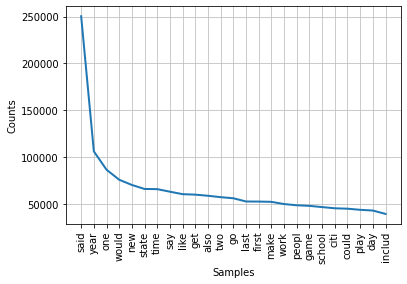

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
word_count.plot(25, cumulative=False)

In [28]:
words = ' '.join(news)

In [29]:
wordcloud = WordCloud().generate(words)

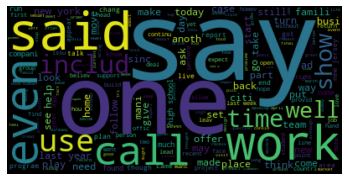

In [30]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [52]:
two_grams = ngrams(news, n=2)

In [53]:
two_grams_freq = collections.Counter(two_grams)

In [54]:
two_grams_freq.most_common(20)

[(('last', 'year'), 15042),
 (('new', 'york'), 12081),
 (('high', 'school'), 9378),
 (('new', 'jersey'), 8477),
 (('year', 'ago'), 8465),
 (('last', 'week'), 7335),
 (('lo', 'angel'), 5188),
 (('two', 'year'), 4972),
 (('san', 'francisco'), 4738),
 (('unit', 'state'), 4733),
 (('first', 'time'), 4396),
 (('last', 'month'), 4360),
 (('next', 'year'), 3602),
 (('health', 'care'), 3584),
 (('look', 'like'), 3414),
 (('said', 'would'), 3413),
 (('three', 'year'), 3386),
 (('offici', 'said'), 3361),
 (('make', 'sure'), 3219),
 (('school', 'district'), 3202)]

In [58]:
three_grams = ngrams(news, n=3)

In [59]:
three_grams_freq = collections.Counter(three_grams)

In [60]:
three_grams_freq.most_common(20)

[(('presid', 'barack', 'obama'), 1787),
 (('new', 'york', 'citi'), 1488),
 (('two', 'year', 'ago'), 1131),
 (('gov', 'chri', 'christi'), 1121),
 (('world', 'war', 'ii'), 770),
 (('new', 'york', 'time'), 670),
 (('first', 'time', 'sinc'), 636),
 (('three', 'year', 'ago'), 557),
 (('four', 'year', 'ago'), 543),
 (('cent', 'per', 'share'), 519),
 (('superior', 'court', 'judg'), 497),
 (('two', 'week', 'ago'), 496),
 (('high', 'school', 'student'), 494),
 (('counti', 'prosecutor', 'offic'), 484),
 (('past', 'two', 'year'), 454),
 (('counti', 'sheriff', 'offic'), 453),
 (('chief', 'execut', 'offic'), 447),
 (('five', 'year', 'ago'), 441),
 (('told', 'associ', 'press'), 422),
 (('averag', 'point', 'rebound'), 421)]

## Predicciones

In [ ]:
ngramas = {
    2: list(two_grams),
    3: list(three_grams),
    4: list(four_grams)
}

print(len(news))

In [ ]:
news_dataset = [[]]
c = 0
for new in news:
    news_dataset[int(c/10)].append(blog)
    c+=1
    if c %10 == 0:
        news_dataset.append([])

In [ ]:
from collections import Counter, defaultdict
from nltk.corpus import reuters
from nltk import bigrams, trigrams
nltk.download('reuters')

In [ ]:
model = defaultdict(lambda: defaultdict(lambda: 0))

print(blogs[0])

for sentence in news_dataset:
    for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
        model[(w1, w2)][w3] += 1
        
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3] /= total_count